# Import packages

In [ ]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import os
if Path.cwd().parts[-1] != 'Multifirefly-Project':
    if Path.cwd().parts[-1] != 'notebooks':
        os.chdir('..')
    from add_path import find_path
    current_path = find_path()
    os.chdir(current_path)

import sys
from data_wrangling import specific_utils, process_monkey_information
from pattern_discovery import pattern_by_trials, pattern_by_trials, cluster_analysis, organize_patterns_and_features
from visualization import plot_behaviors_utils
from non_behavioral_analysis.neural_data_analysis.get_neural_data import neural_data_processing
from non_behavioral_analysis.neural_data_analysis.visualize_neural_data import plot_neural_data, plot_modeling_result
from non_behavioral_analysis.neural_data_analysis.model_neural_data import cca_class, pgam_class, neural_data_modeling, reduce_multicollinearity
from non_behavioral_analysis.neural_data_analysis.neural_vs_behavioral import prep_monkey_data, prep_target_data, neural_vs_behavioral_class
from non_behavioral_analysis.neural_data_analysis.planning_neural import planning_neural_class, planning_neural_utils

import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import math
import seaborn as sns
from matplotlib import rc
from os.path import exists
from numpy import random
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from importlib import reload
import neo
import gc
import rcca
from statsmodels.multivariate.cancorr import CanCorr

import sys
import os
import numpy as np
import torch
from numpy import pi
from matplotlib import pyplot as plt

import numpy as np
import scipy.linalg as linalg
import scipy.interpolate as interpolate
from scipy.signal import fftconvolve


from scipy.io import loadmat
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import sys

import scipy.sparse as sparse
import matplotlib.pylab as plt
import subprocess

plt.rcParams["animation.html"] = "html5"
os.environ['KMP_DUPLICATE_LIB_OK']='True'
rc('animation', html='jshtml')
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
matplotlib.rcParams['animation.embed_limit'] = 2**128
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(suppress=True)
print("done")

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
done
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Retrieve data

In [ ]:
raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Bruno/data_0330"

In [69]:
raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Schro/data_0416"

In [70]:
data_item = neural_vs_behavioral_class.NeuralVsBehavioralClass(raw_data_folder_path=raw_data_folder_path)
data_item.streamline_preparing_neural_and_behavioral_data()

Retrieved monkey data from  all_monkey_data/processed_data/monkey_Schro/data_0416/monkey_information.csv  and ff data from  all_monkey_data/processed_data/monkey_Schro/data_0416/ff_basic_info.npz
Note: ff_caught_T_sorted is replaced with ff_caught_T_new
Retrieved ff_dataframe from  all_monkey_data/processed_data/monkey_Schro/data_0416/ff_dataframe.h5
When take out monkey subset for GUAT, 139 clusters out of 241 are too close to the target or the last target. Those clusters are filtered out.
The number of new trials that are used to separate stop clusters is 470
Retrieved all_trial_patterns
Retrieved pattern_frequencies
Retrieved all_trial_features
Retrieved feature_statistics
Retrieved scatter_around_target_df
Updated window width (to get convolved data):  1


/Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/methods/non_behavioral_analysis/neural_data_analysis/neural_vs_behavioral/prep_monkey_data.py:170: RuntimeWarning: divide by zero encountered in divide
  rebinned_monkey_info_essential['stop_success_rate'] = num_caught_ff_convolved/num_distinct_stops_convolved
/Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/methods/non_behavioral_analysis/neural_data_analysis/neural_vs_behavioral/prep_monkey_data.py:170: RuntimeWarning: invalid value encountered in divide
  rebinned_monkey_info_essential['stop_success_rate'] = num_caught_ff_convolved/num_distinct_stops_convolved


# Planning

## get data

In [72]:
ref_point_mode='distance'
ref_point_value=-150

normalize = False
eliminate_outliers = False
use_curvature_to_ff_center = False
curv_of_traj_mode = 'distance'
window_for_curv_of_traj=[-25, 25]

pn = planning_neural_class.PlanningAndNeural(raw_data_folder_path=raw_data_folder_path)
pn.streamline_organizing_info(ref_point_mode='time after cur ff visible', ref_point_value=0.1, 
                               curv_of_traj_mode=curv_of_traj_mode, window_for_curv_of_traj=window_for_curv_of_traj, truncate_curv_of_traj_by_time_of_capture=True,
                               use_curvature_to_ff_center=use_curvature_to_ff_center,  eliminate_outliers=eliminate_outliers)


Retrieved monkey data from  all_monkey_data/processed_data/monkey_Schro/data_0416/monkey_information.csv  and ff data from  all_monkey_data/processed_data/monkey_Schro/data_0416/ff_basic_info.npz
Note: ff_caught_T_sorted is replaced with ff_caught_T_new
Removed 0 rows out of 218 rows where cur_ff was not visible bbas or nxt_ff was not visible both bbas and bsans
shared_stops_near_ff_df has 218 rows
Retrieving shared_stops_near_ff_df succeeded
Retrieving stop_0_1_window_-50cm_0cm from all_monkey_data/planning/monkey_Schro/data_0416/diff_in_curv_df/norm_opt_arc/test/stop_0_1_window_-50cm_0cm succeeded
Retrieving Schro_stop_0_1 from all_monkey_data/planning/monkey_Schro/data_0416/heading_info_df/norm_opt_arc/test/Schro_stop_0_1 succeeded


In [73]:
pn.retrieve_neural_data()

Updated window width (to get convolved data):  1


In [74]:
pn.get_all_planning_info()

,point_index,nxt_ff_angle,nxt_ff_distance,nxt_arc_curv,alt_opt_arc_curv,alt_opt_arc_dheading,time_rel_to_stop,traj_curv,cur_ff_angle,cur_ff_distance,cur_arc_curv,cur_opt_arc_curv,cur_opt_arc_dheading,stop_point_index,bin,angle_from_m_before_stop_to_cur_ff,angle_from_m_before_stop_to_nxt_ff,angle_from_cur_ff_landing_to_nxt_ff
0,1367,-0.35699,675.75991,-0.00103,-0.00110,-0.75239,-1.95878,-0.00201,-0.43375,267.68534,-0.00314,-0.00276,-0.77125,1485,92,-0.03352,0.45720,0.41454
1,1610,0.12300,190.75416,0.00129,0.00078,0.14999,2.04181,0.00078,NaN,NaN,NaN,NaN,NaN,1485,108,-0.03352,0.45720,0.41454
2,1595,0.13169,236.23669,0.00111,0.00094,0.22190,1.79281,0.00094,NaN,NaN,NaN,NaN,NaN,1485,107,-0.03352,0.45720,0.41454
3,1580,0.17729,277.58356,0.00127,0.00089,0.24811,1.54377,0.00043,NaN,NaN,NaN,NaN,NaN,1485,106,-0.03352,0.45720,0.41454
4,1565,0.13057,322.21631,0.00081,0.00109,0.35143,1.29480,0.00352,NaN,NaN,NaN,NaN,NaN,1485,105,-0.03352,0.45720,0.41454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1373,143922,0.07828,404.48747,0.00039,0.00020,0.08251,-1.47751,-0.00329,0.02906,254.32638,0.00023,0.00000,0.00025,144011,9539,-0.17906,0.01452,0.28067
1374,143907,0.05798,414.51035,0.00028,0.00011,0.04360,-1.72643,-0.00021,0.01004,264.35775,0.00008,0.00000,0.00026,144011,9538,-0.17906,0.01452,0.28067
1375,144075,-0.14013,37.88314,-0.00737,-0.00000,-0.00004,1.02920,0.00035,NaN,NaN,NaN,NaN,NaN,144011,9549,-0.17906,0.01452,0.28067
1376,143967,0.07709,269.52875,0.00057,0.00093,0.24952,-0.73043,0.00093,0.03751,118.70627,0.00063,0.00093,0.11032,144011,9542,-0.17906,0.01452,0.28067


In [75]:
pn.both_ff_across_time_df.head(5)

,point_index,nxt_ff_angle,nxt_ff_distance,nxt_arc_curv,alt_opt_arc_curv,alt_opt_arc_dheading,time_rel_to_stop,traj_curv,cur_ff_angle,cur_ff_distance,cur_arc_curv,cur_opt_arc_curv,cur_opt_arc_dheading,stop_point_index,bin
0,1367,-0.35699,675.75991,-0.00103,-0.00110,-0.75239,-1.95878,-0.00201,-0.43375,267.68534,-0.00314,-0.00276,-0.77125,1485,92
1,1610,0.12300,190.75416,0.00129,0.00078,0.14999,2.04181,0.00078,NaN,NaN,NaN,NaN,NaN,1485,108
2,1595,0.13169,236.23669,0.00111,0.00094,0.22190,1.79281,0.00094,NaN,NaN,NaN,NaN,NaN,1485,107
3,1580,0.17729,277.58356,0.00127,0.00089,0.24811,1.54377,0.00043,NaN,NaN,NaN,NaN,NaN,1485,106
4,1565,0.13057,322.21631,0.00081,0.00109,0.35143,1.29480,0.00352,NaN,NaN,NaN,NaN,NaN,1485,105


In [76]:
columns_to_drop = ['nxt_opt_arc_dheading',
    'nxt_arc_curv',
  'angle_from_cur_ff_landing_to_nxt_ff',
  
 # preserve "alt + alt" or 'stop + stop' but not 'alt + stop' or 'stop + alt'. Otherwise the correlation shall be too great
#  'nxt_ff_distance_when_cur_ff_first_seen',
#  'nxt_ff_distance_when_cur_ff_last_seen',
#  'cur_ff_distance_when_nxt_ff_first_seen',
#  'cur_ff_distance_when_nxt_ff_last_seen',
#  'cur_ff_angle_when_nxt_ff_first_seen',
#  'nxt_ff_angle_when_cur_ff_first_seen',
#  'cur_ff_angle_when_nxt_ff_last_seen',
#  'nxt_ff_angle_when_cur_ff_last_seen',
]


In [ ]:
# drop rows with NA in all_planning_info and print the percentage of rows dropped
all_planning_info2 = pn.all_planning_info.drop(columns=columns_to_drop, errors='ignore').copy()
all_planning_info2 = all_planning_info2.dropna().copy()
all_planning_info2.drop(columns={'stop_point_index', 'point_index'}, inplace=True)
print("Percentage of rows dropped: ", 1 - all_planning_info2.shape[0] / len(pn.all_planning_info))
data_item.y_var = all_planning_info2.copy()

_, pn.binned_spikes_df = neural_data_processing.prepare_binned_spikes_matrix_and_df(pn.all_binned_spikes, data_item.max_bin)
pn.binned_spikes_df['bin'] = np.arange(pn.binned_spikes_df.shape[0])
neural_bins_sub2 = pn.binned_spikes_df[pn.binned_spikes_df['bin'].isin(all_planning_info2['bin'].values)]
data_item.x_var = neural_bins_sub2.drop(columns=['bin'])

Percentage of rows dropped:  0.5333817126269956


In [78]:
pn.all_planning_info.shape

(1378, 18)

In [79]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
pd.DataFrame(pn.all_planning_info.isnull().sum())

,0
point_index,0
nxt_ff_angle,50
nxt_ff_distance,50
nxt_arc_curv,50
alt_opt_arc_curv,50
alt_opt_arc_dheading,50
time_rel_to_stop,50
traj_curv,50
cur_ff_angle,699
cur_ff_distance,699


In [112]:
print('data_item.x_var.shape:', data_item.x_var.shape)
print('binned_spikes_df.shape:', pn.binned_spikes_df.shape)
print('data_item.y_var.shape:', data_item.y_var.shape)

data_item.x_var.shape: (643, 86)
binned_spikes_df.shape: (14398, 87)
data_item.y_var.shape: (643, 13)


nxt_ff_angle, R: 0.47, R^2: 0.225, overall_p: 1.6089120961981193e-05
nxt_ff_distance, R: 0.44, R^2: 0.194, overall_p: 0.0019539225619119465
alt_opt_arc_curv, R: 0.49, R^2: 0.236, overall_p: 1.8220354793591269e-06
time_rel_to_stop, R: 0.4, R^2: 0.162, overall_p: 0.07232410845323631
traj_curv, R: 0.42, R^2: 0.177, overall_p: 0.016230068301591245
cur_ff_angle, R: 0.46, R^2: 0.214, overall_p: 9.636642077158461e-05
cur_ff_distance, R: 0.39, R^2: 0.149, overall_p: 0.20877293144001907
cur_arc_curv, R: 0.42, R^2: 0.179, overall_p: 0.012830119017860355
cur_opt_arc_curv, R: 0.45, R^2: 0.202, overall_p: 0.0006726049515181217
cur_opt_arc_dheading, R: 0.46, R^2: 0.209, overall_p: 0.00020425547231502097


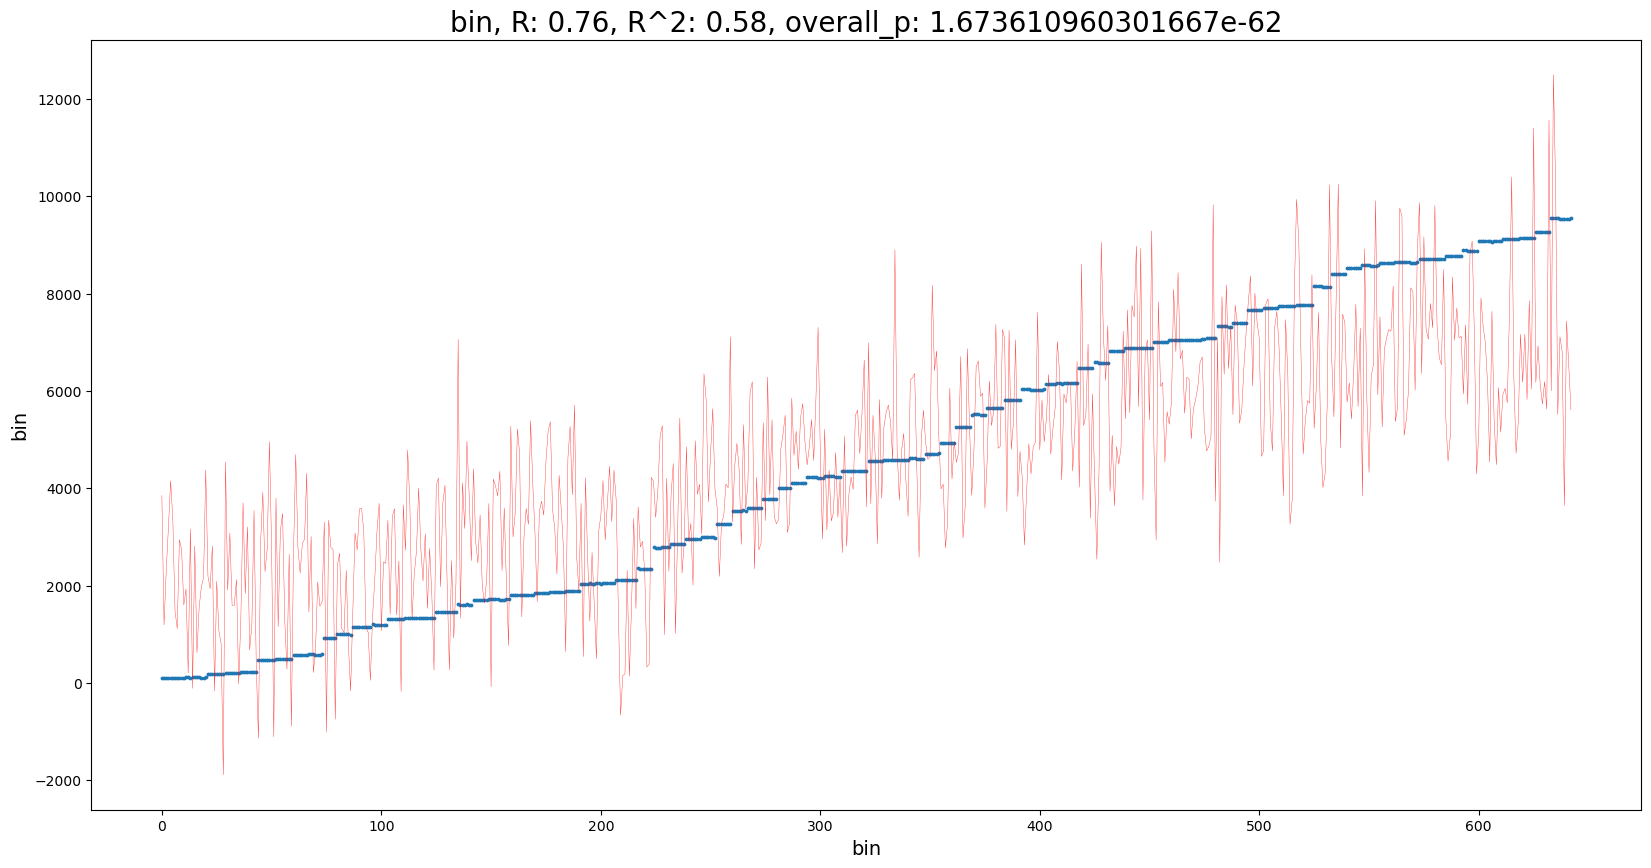

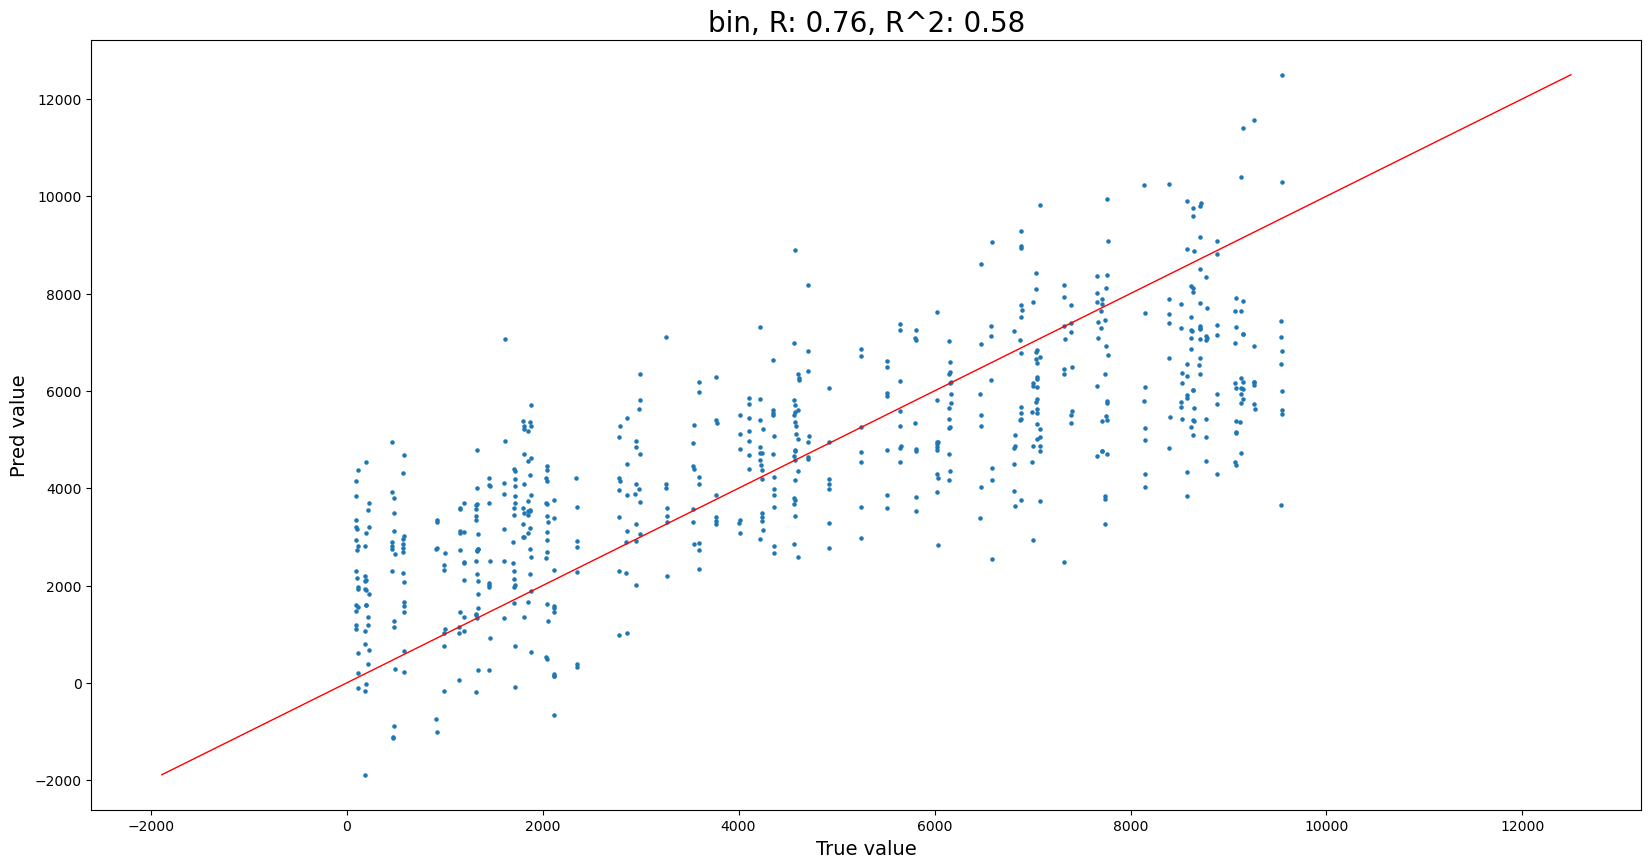

angle_from_m_before_stop_to_cur_ff, R: 0.41, R^2: 0.164, overall_p: 0.06029118920305736
angle_from_m_before_stop_to_nxt_ff, R: 0.41, R^2: 0.169, overall_p: 0.039751837853689666


In [81]:
# conduct linear regression on X and y
plt.rcParams["figure.figsize"] = (20, 10)
bins_to_plot = range(all_planning_info2.bin.max())
for i, column in enumerate(data_item.y_var.columns):
    plot_neural_data.plot_regression(data_item.y_var, column, data_item.x_var, bins_to_plot=None, min_r_squared_to_plot=0.3)
    # if i == 3:
    #     break

### VIF

In [82]:
vif = pd.DataFrame({
    "vif": [variance_inflation_factor(data_item.y_var.values, i) for i in range(data_item.y_var.shape[1])],
    "features": data_item.y_var.columns
}).sort_values(by='vif', ascending=False).round(1)
vif.reset_index(drop=False, inplace=True)

vif

,index,vif,features
0,6,14.00000,cur_ff_distance
1,0,13.10000,nxt_ff_angle
2,3,12.30000,time_rel_to_stop
3,2,9.10000,alt_opt_arc_curv
4,9,7.40000,cur_opt_arc_dheading
5,1,6.90000,nxt_ff_distance
6,8,6.90000,cur_opt_arc_curv
7,12,3.70000,angle_from_m_before_stop_to_nxt_ff
8,5,3.30000,cur_ff_angle
9,4,3.30000,traj_curv


In [83]:
specific_columns = vif.iloc[:15].features.values
specific_columns

array(['cur_ff_distance', 'nxt_ff_angle', 'time_rel_to_stop',
       'alt_opt_arc_curv', 'cur_opt_arc_dheading', 'nxt_ff_distance',
       'cur_opt_arc_curv', 'angle_from_m_before_stop_to_nxt_ff',
       'cur_ff_angle', 'traj_curv', 'bin', 'cur_arc_curv',
       'angle_from_m_before_stop_to_cur_ff'], dtype=object)

In [84]:
fff = [feature for feature in vif.features.tolist() if ('nxt' in feature) and ('cur' in feature)]
fff

['angle_from_m_before_stop_to_nxt_ff']

In [85]:
fff = [feature for feature in vif.features.tolist() if ('nxt_arc_' in feature) or ('nxt_opt' in feature)]
fff

['alt_opt_arc_curv']

In [86]:
 specific_columns = ['cur_ff_distance',
 'cur_ff_angle',
 'cur_opt_arc_dheading',
 'cur_arc_curv']

 specific_columns = ['cur_ff_angle',
 'cur_ff_distance',
 'cur_opt_arc_dheading',
 'cur_opt_arc_curv',
 'cur_arc_curv']

In [87]:
 specific_columns = ['nxt_ff_angle',
 'nxt_ff_distance',
 'nxt_opt_arc_dheading',
 'nxt_opt_arc_curv',
 'nxt_arc_curv']

In [88]:
fff = [feature for feature in vif.features.tolist() if ('nxt' in feature) & ('first_seen' not in feature) & ('last_seen' in feature)]
fff

[]

### Correlations between features

In [ ]:
columns_to_drop = ['nxt_opt_arc_dheading',
    'nxt_arc_curv',
  'angle_from_cur_ff_landing_to_nxt_ff',
  

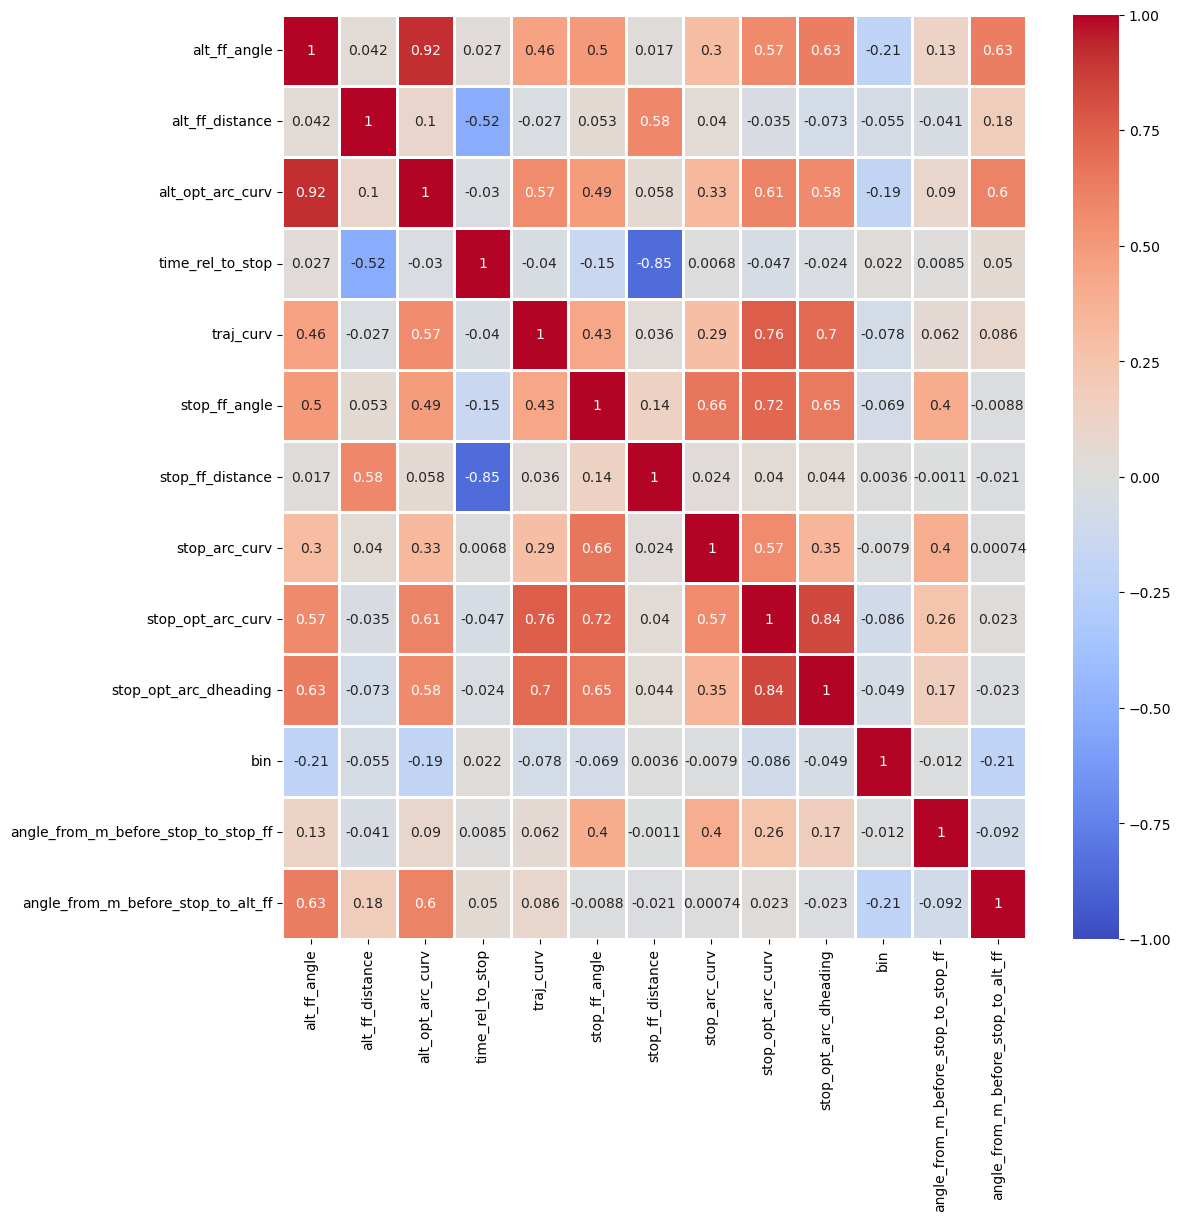

In [93]:
# calculate the correlation coefficient among the columns with VIF > 5
# specific_columns = vif[vif["vif"] > 5].features.values
specific_columns = data_item.y_var.columns
corr_coeff = data_item.y_var[specific_columns].corr()
#plt.figure(figsize = (6, 6))
plt.figure(figsize = (12, 12))
sns.heatmap(corr_coeff, cmap='coolwarm', annot=True, linewidths=1, vmin=-1)
plt.show()

# CCA

https://medium.com/@pozdrawiamzuzanna/canonical-correlation-analysis-simple-explanation-and-python-example-a5b8e97648d2

## No lagging

In [99]:
cca_no_lag = cca_class.CCAclass(X1=data_item.x_var, X2=data_item.y_var, lagging_included=False)

Training CCA, kernel = None, regularization = 0.0000, 10 components
Canonical Correlation Per Component Pair: [0.77208 0.53486 0.47049 0.45207 0.4404  0.42348 0.4002  0.38612 0.35222
 0.34444]
% Shared Variance: [0.59611 0.28607 0.22136 0.20437 0.19395 0.17934 0.16016 0.14909 0.12406
 0.11864]


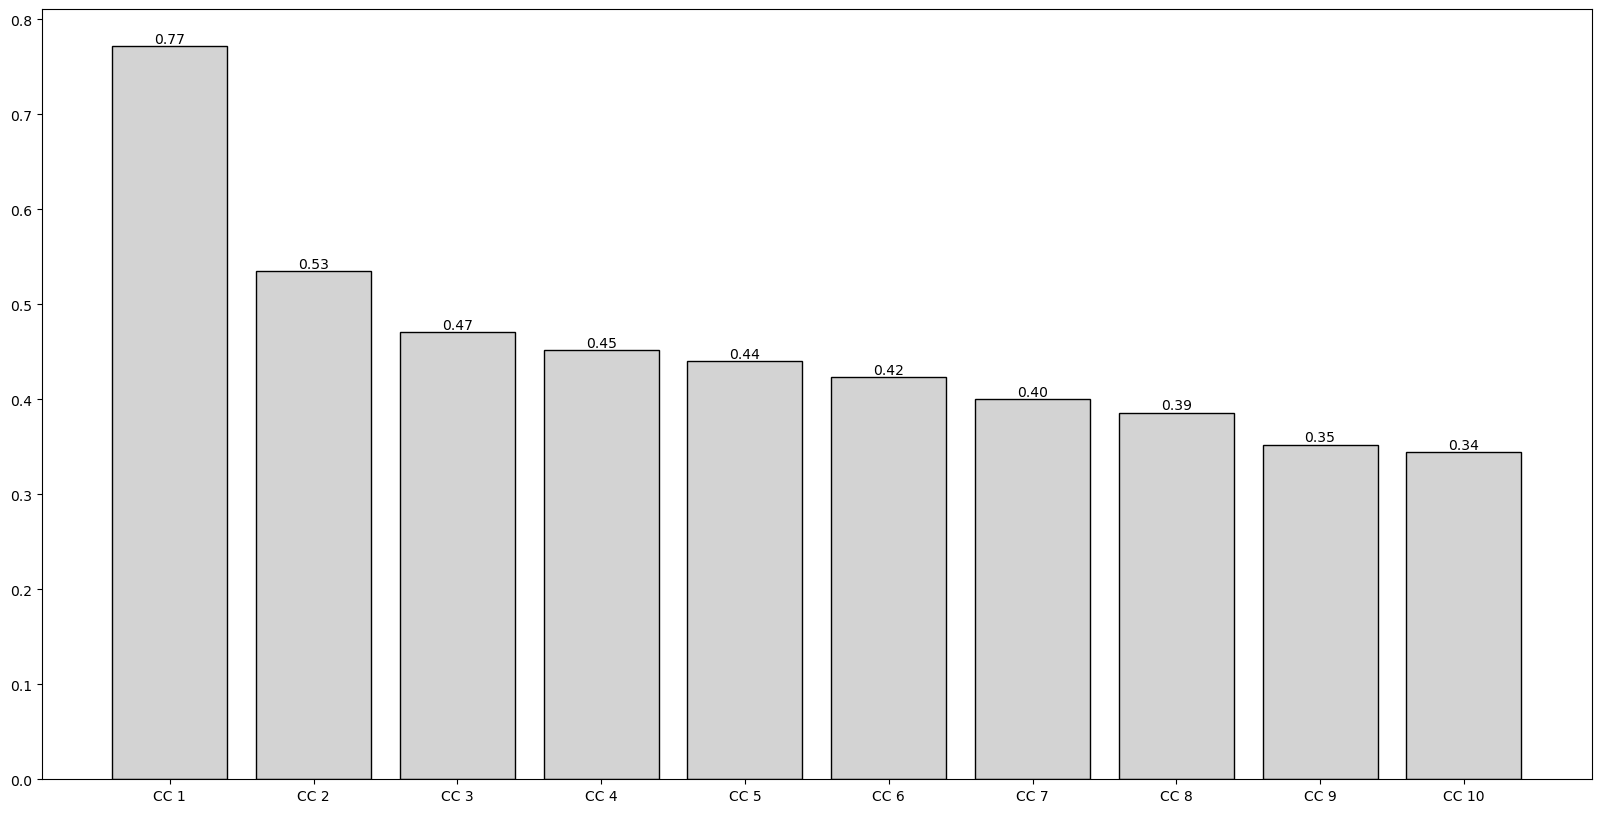

In [100]:
cca_no_lag.conduct_cca()
cca_inst = cca_no_lag

## loadings

### neurons

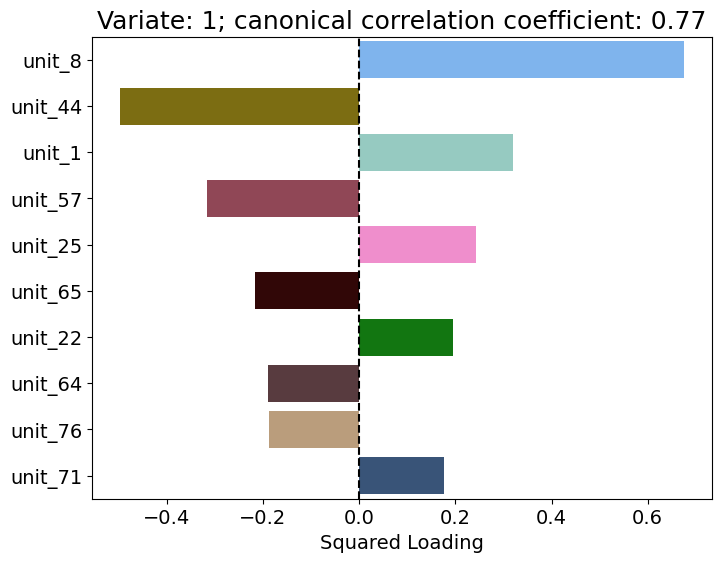

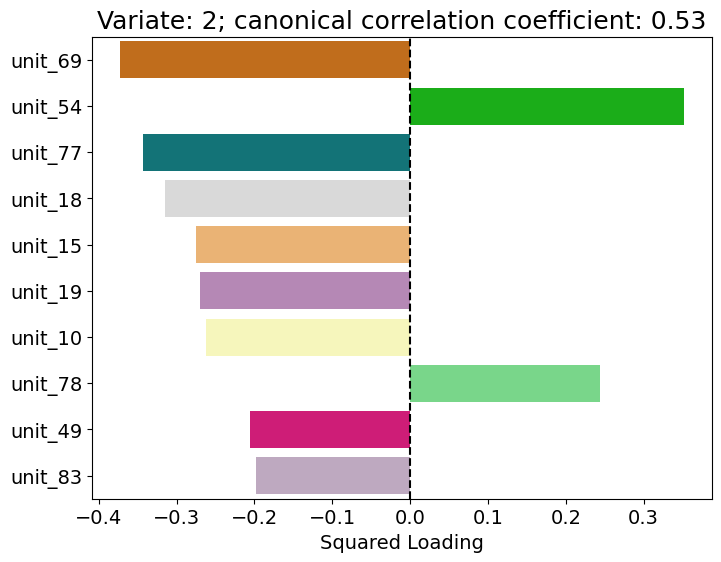

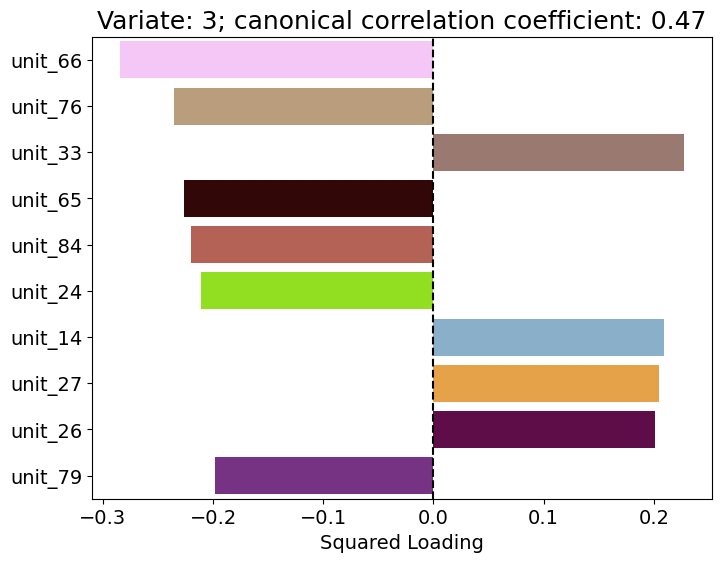

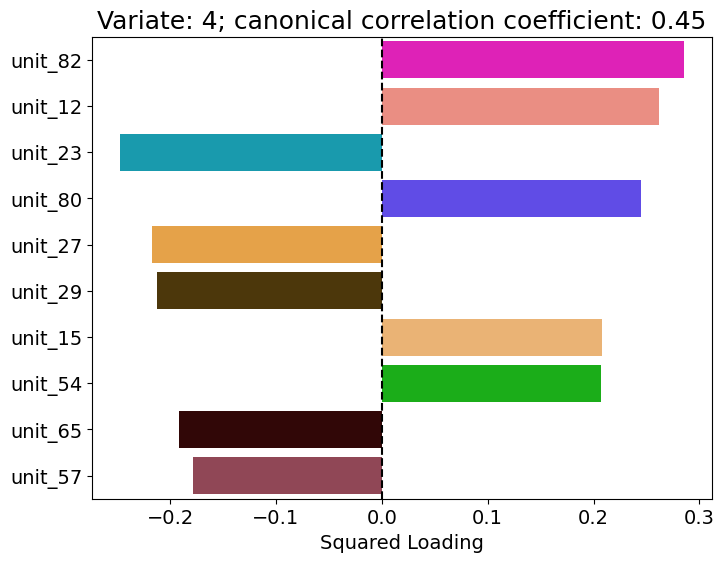

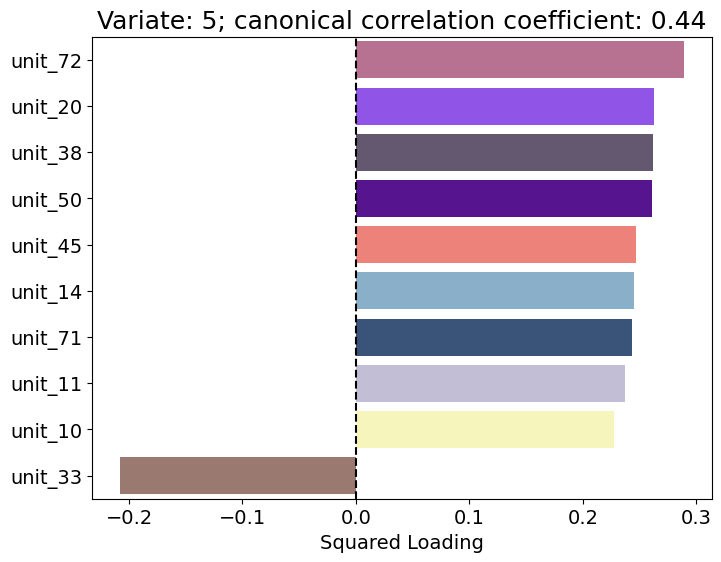

In [101]:
cca_inst.plot_ranked_loadings(X1_or_X2='X1', squared=False)

### behavior

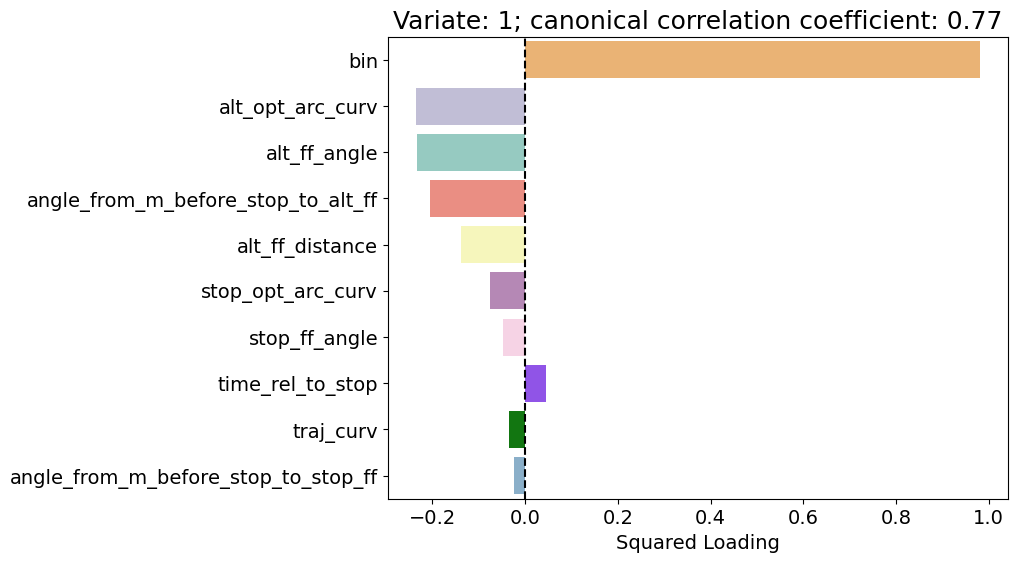

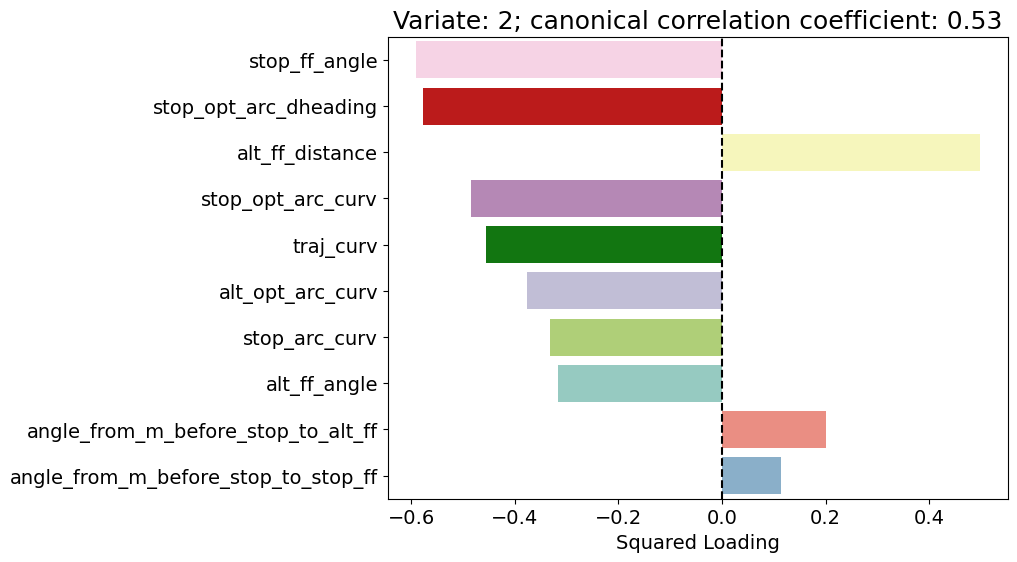

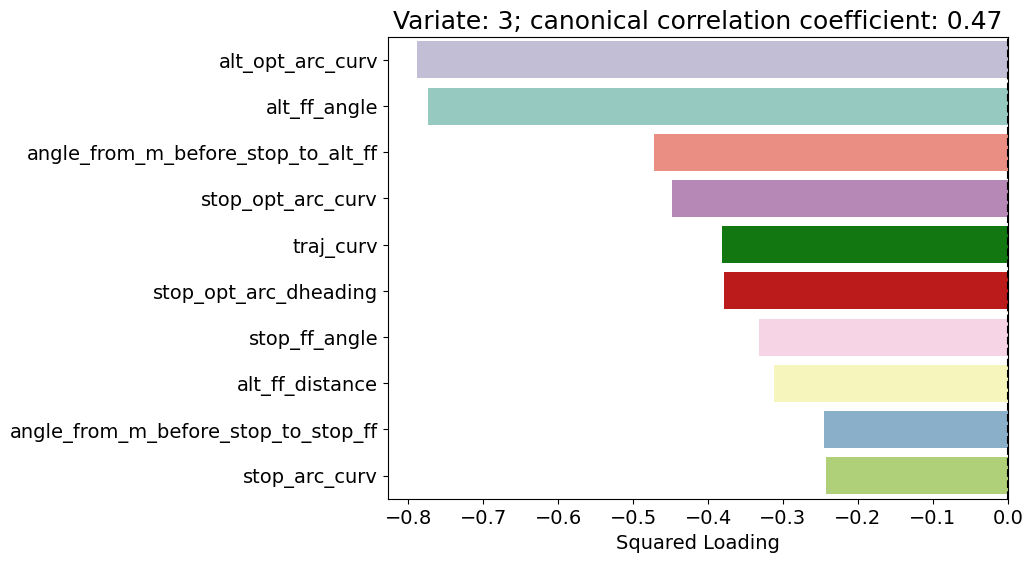

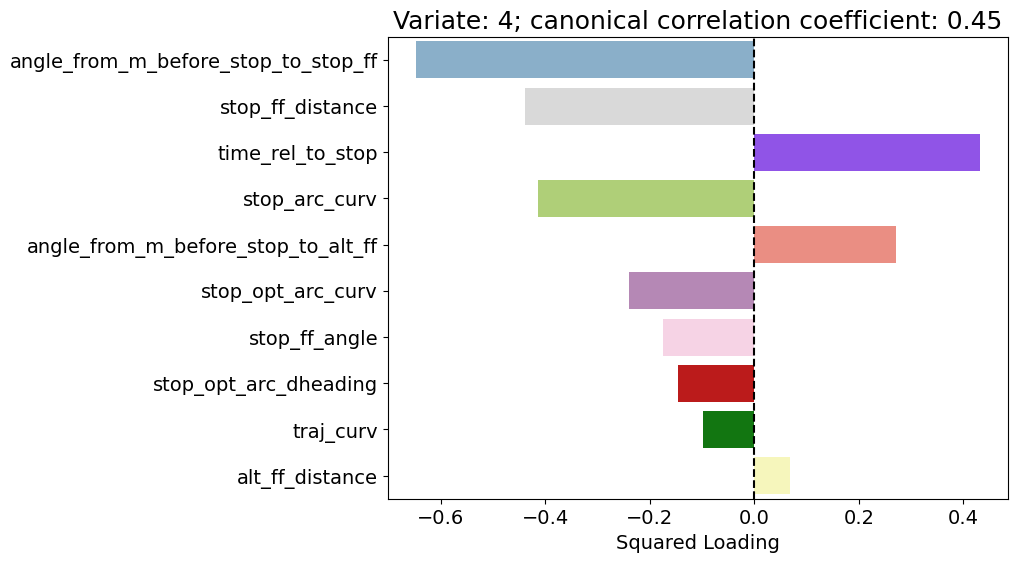

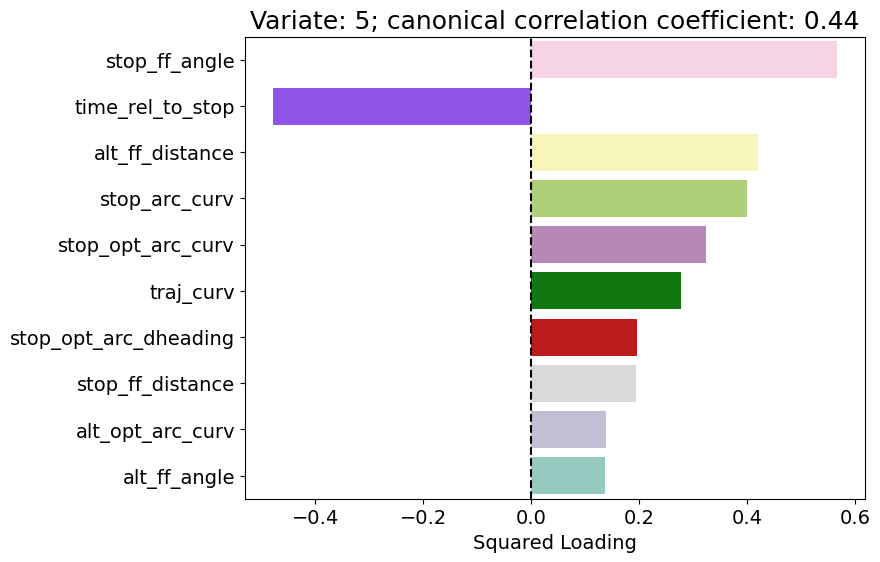

In [102]:
cca_inst.plot_ranked_loadings(X1_or_X2='X2', squared=False)

## squared loadings

### neurons

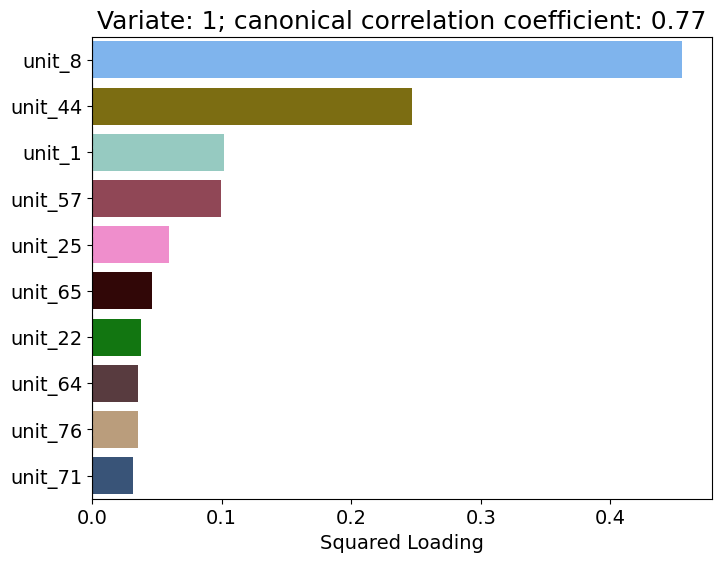

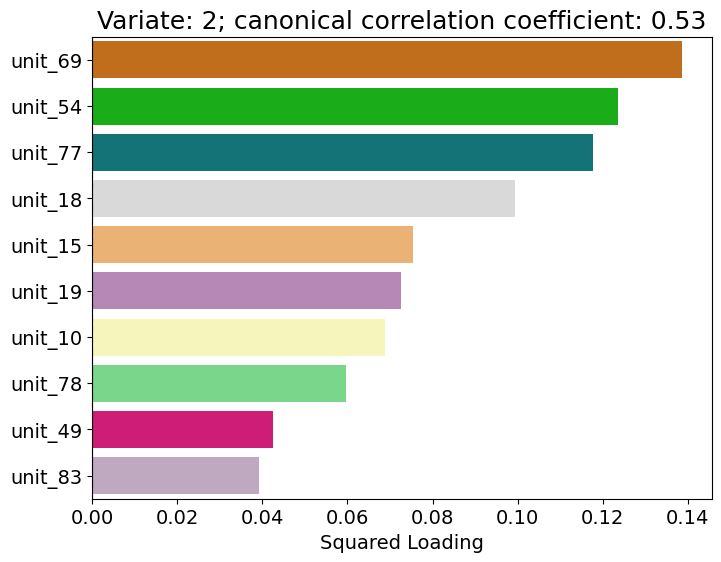

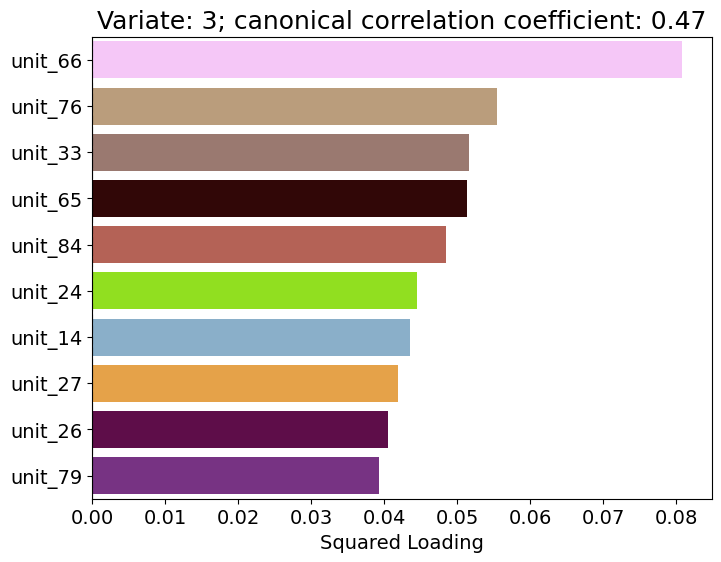

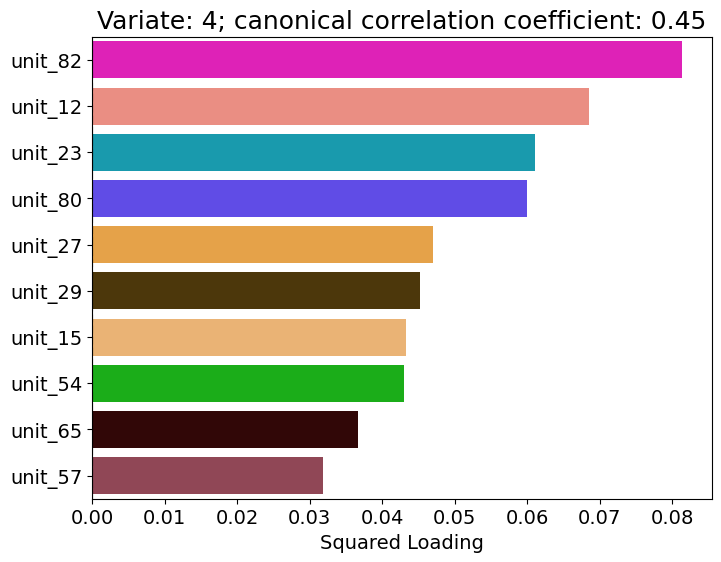

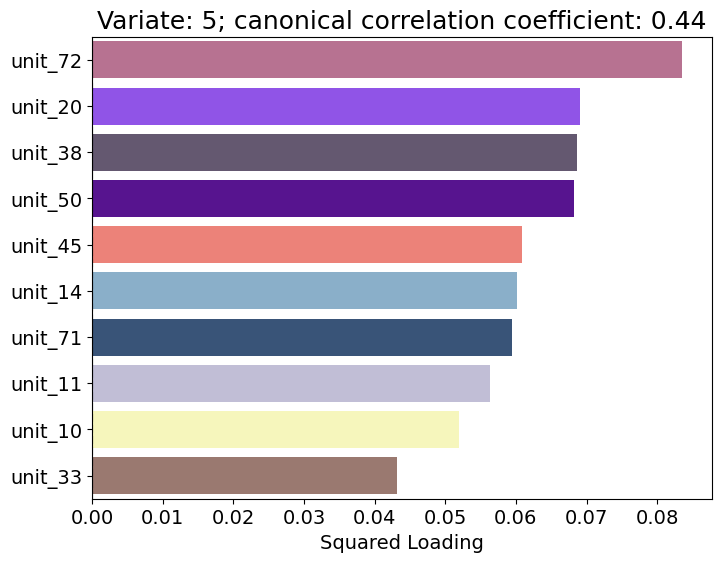

In [103]:
cca_inst.plot_ranked_loadings(X1_or_X2='X1')

### behavior

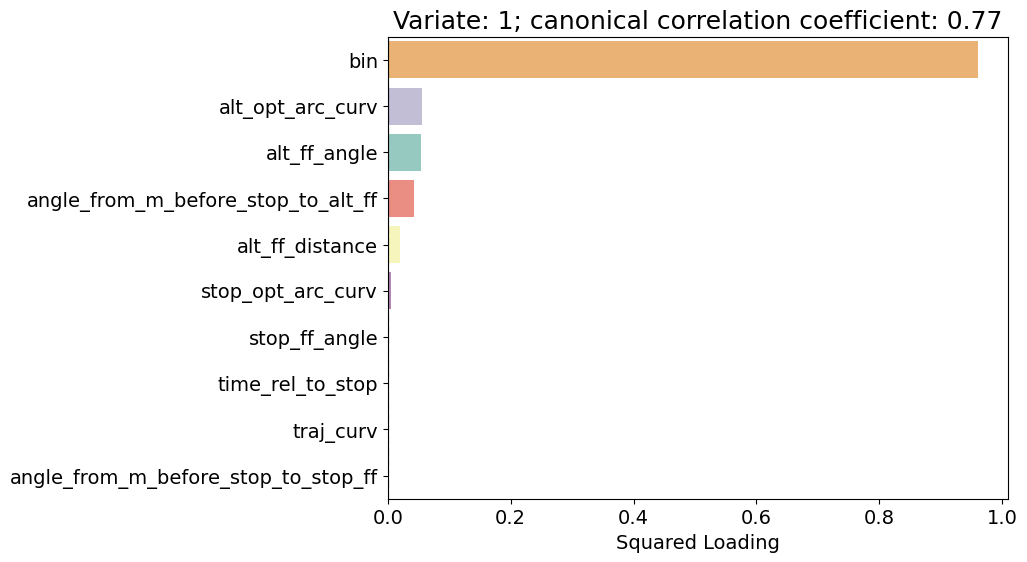

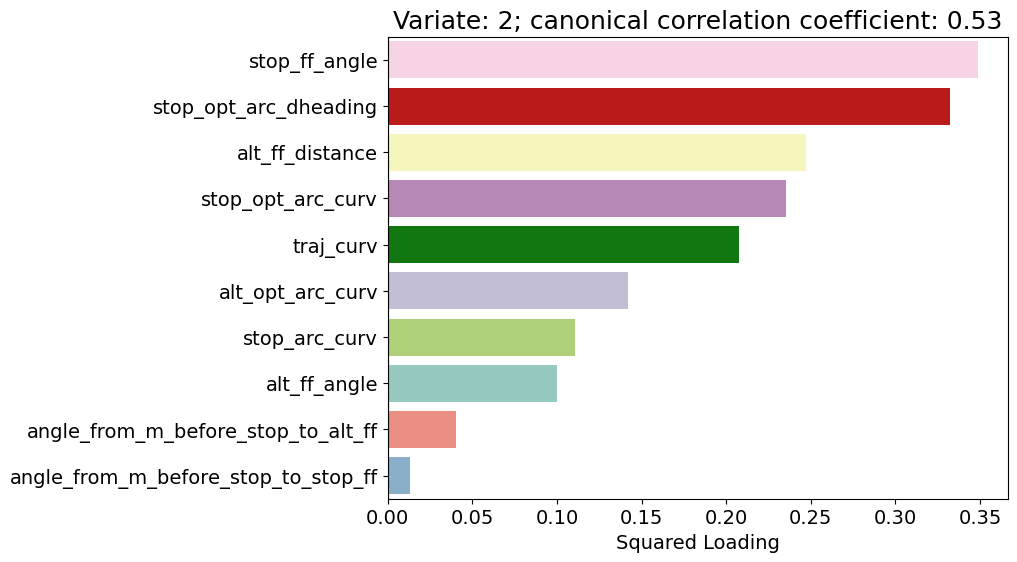

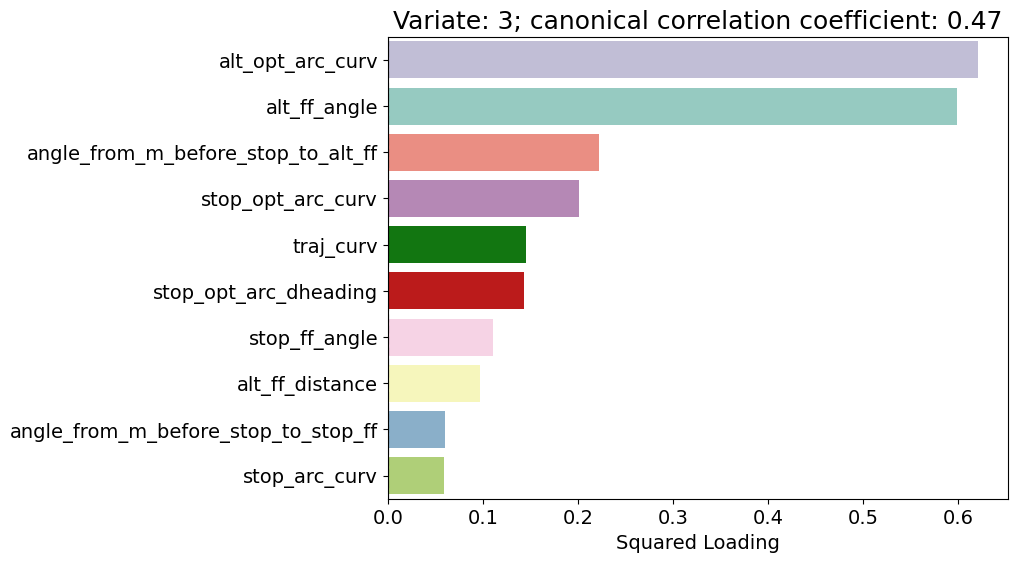

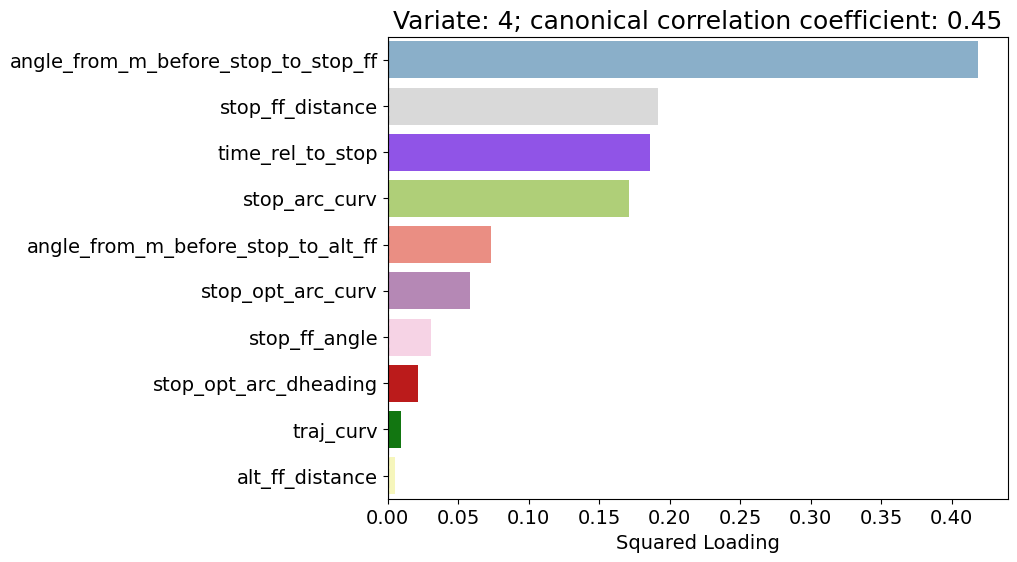

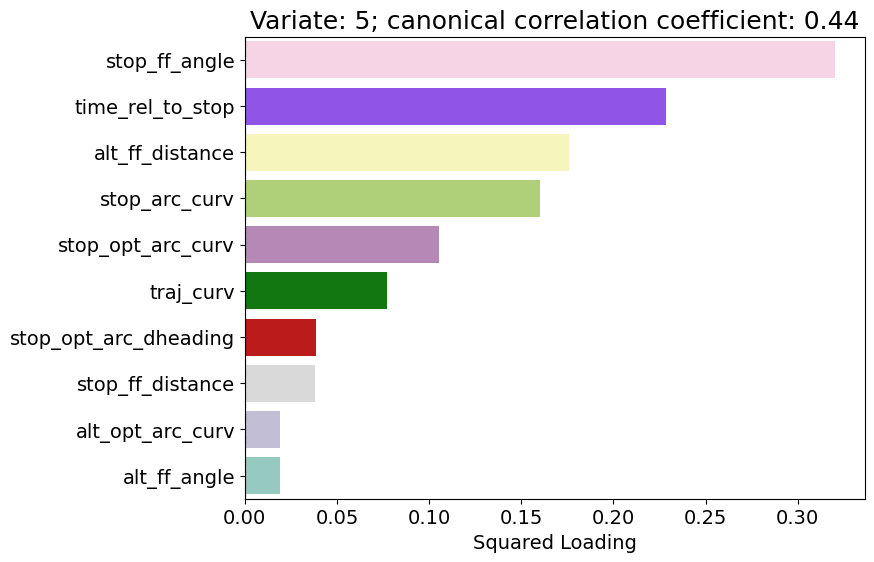

In [104]:
cca_inst.plot_ranked_loadings(X1_or_X2='X2')

## abs weights ranked

### neurons

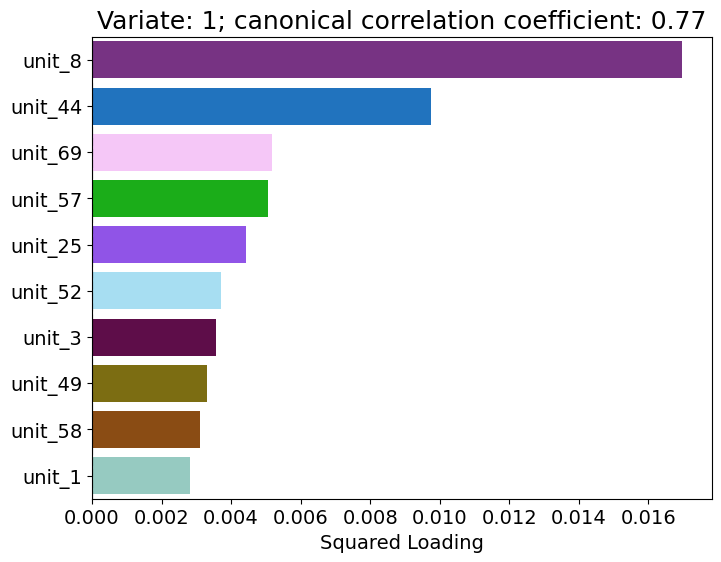

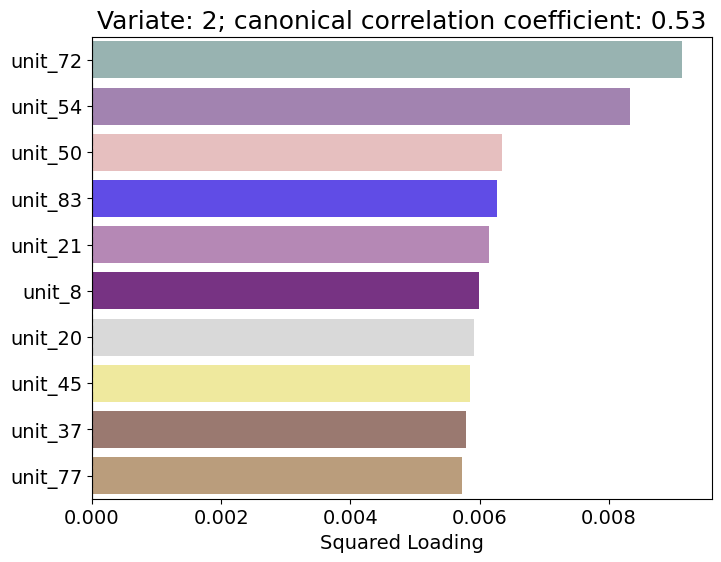

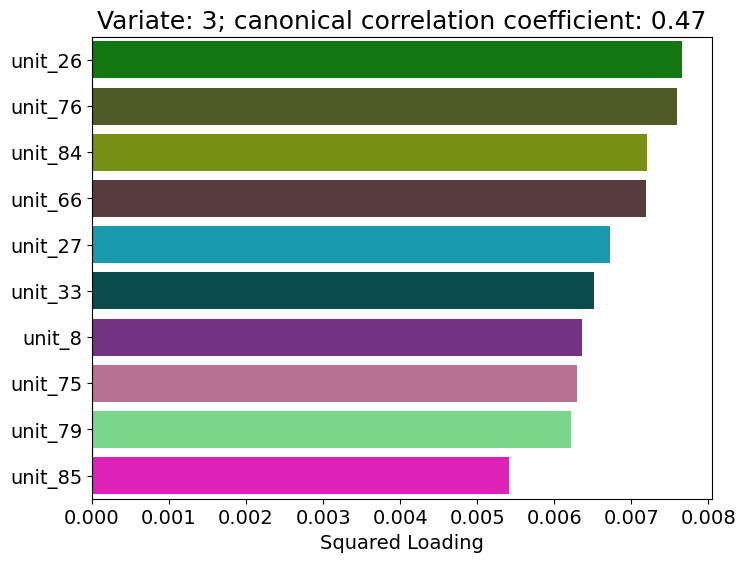

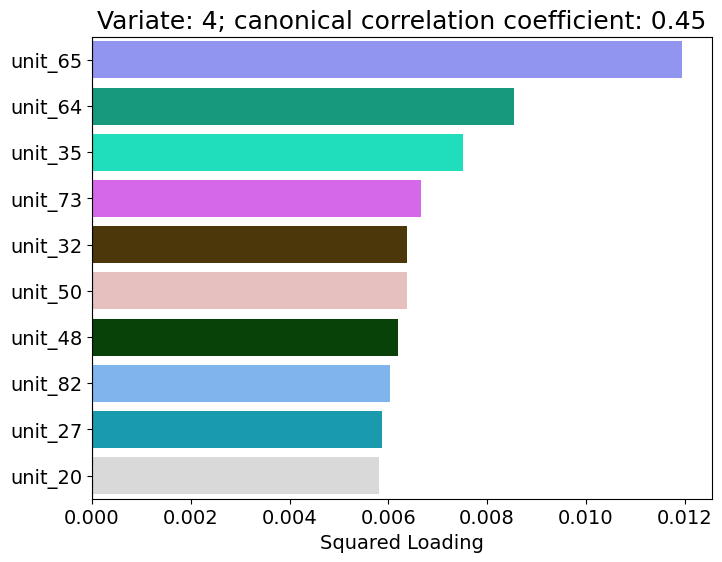

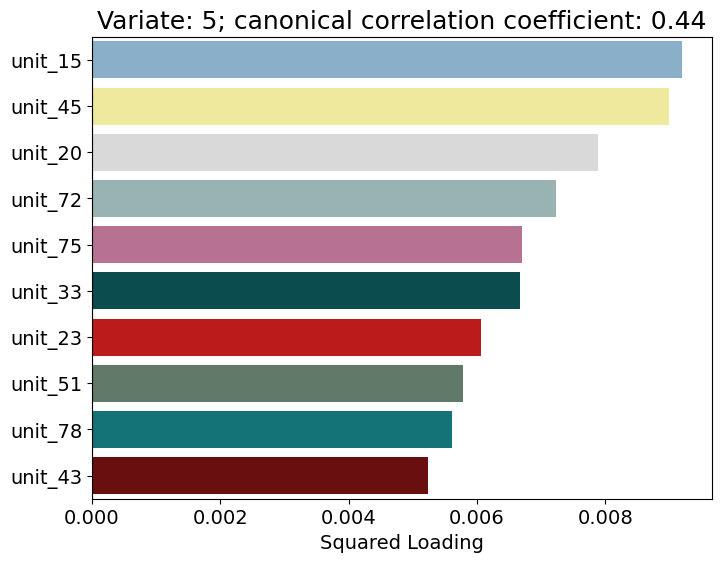

In [106]:
cca_inst.plot_ranked_weights()

### behavior

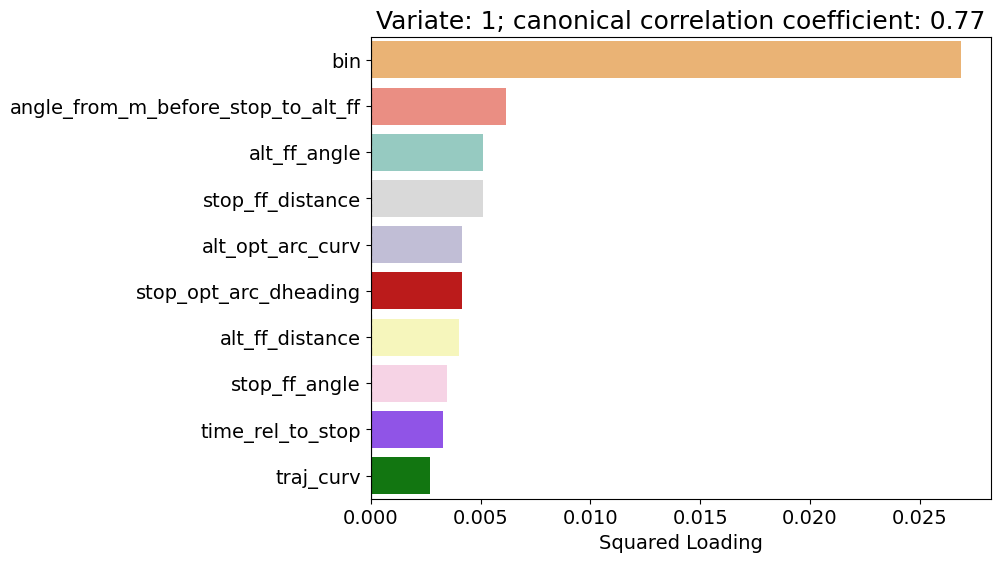

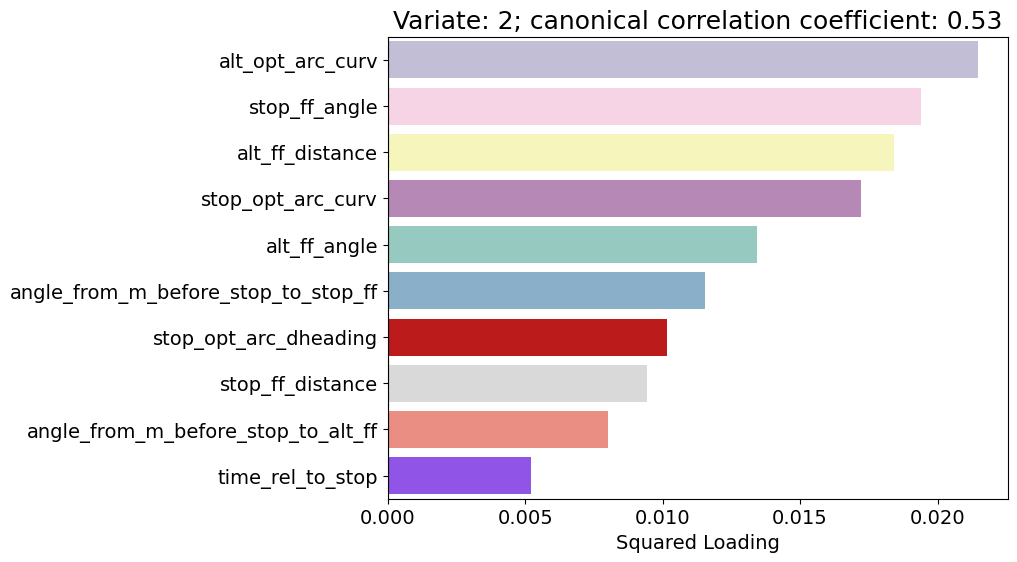

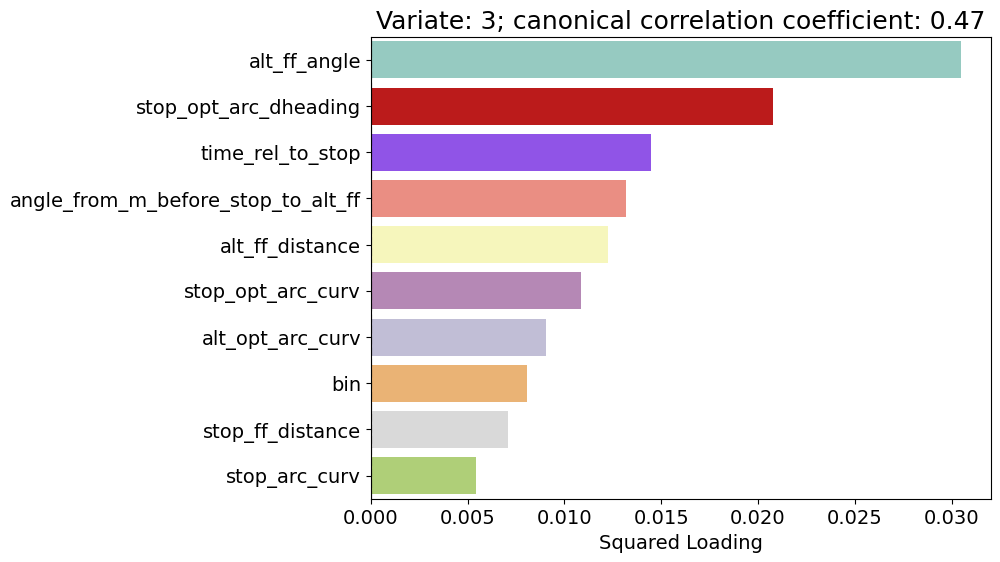

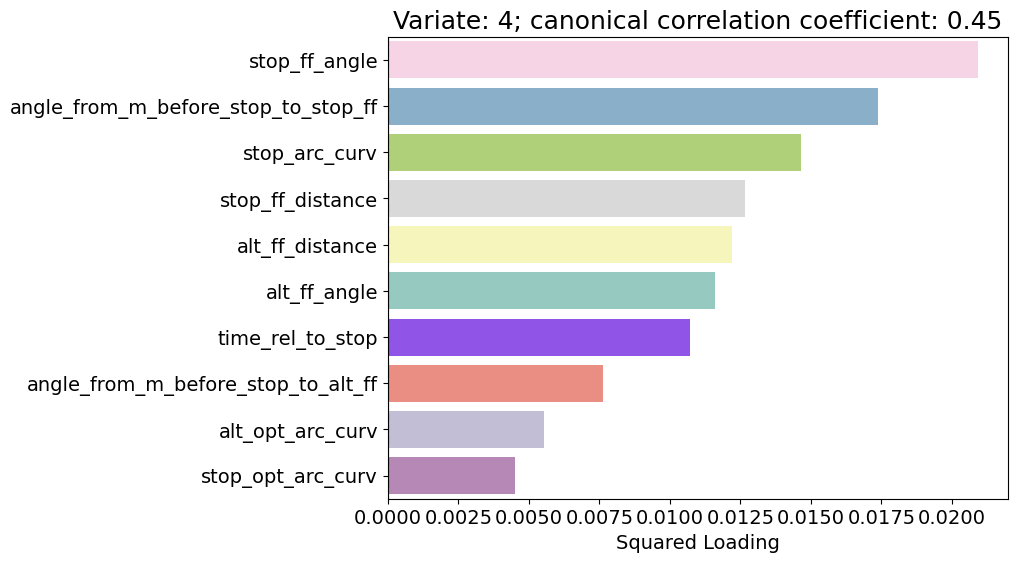

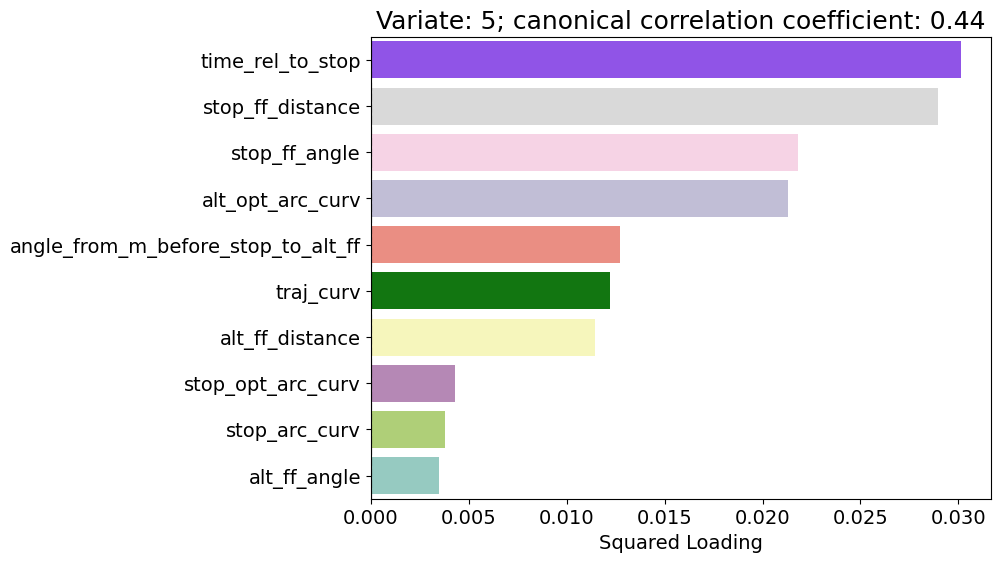

In [107]:
cca_inst.plot_ranked_weights(X1_or_X2='X2')

## plot real weights

### neurons

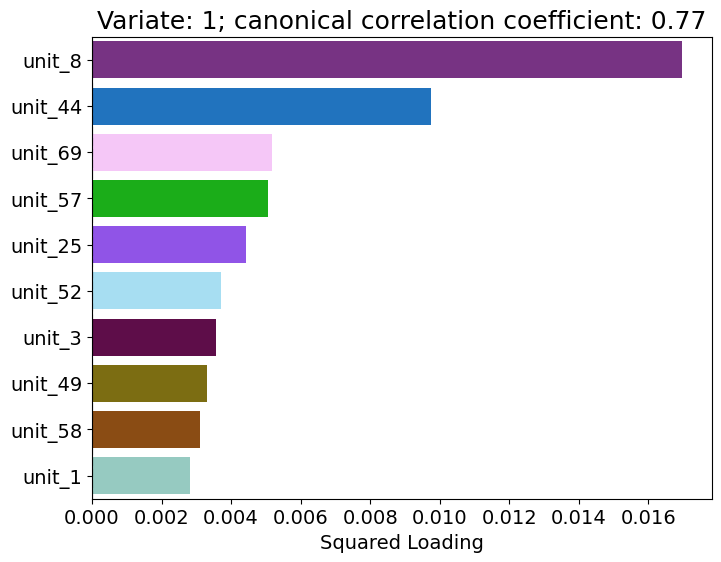

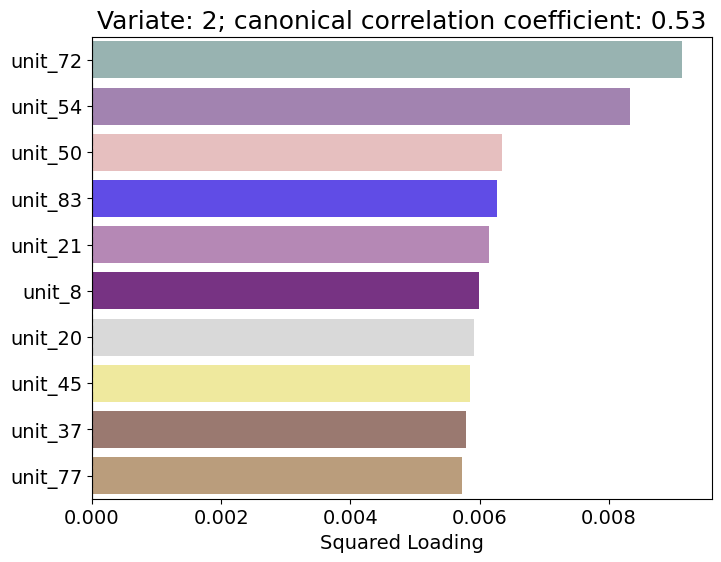

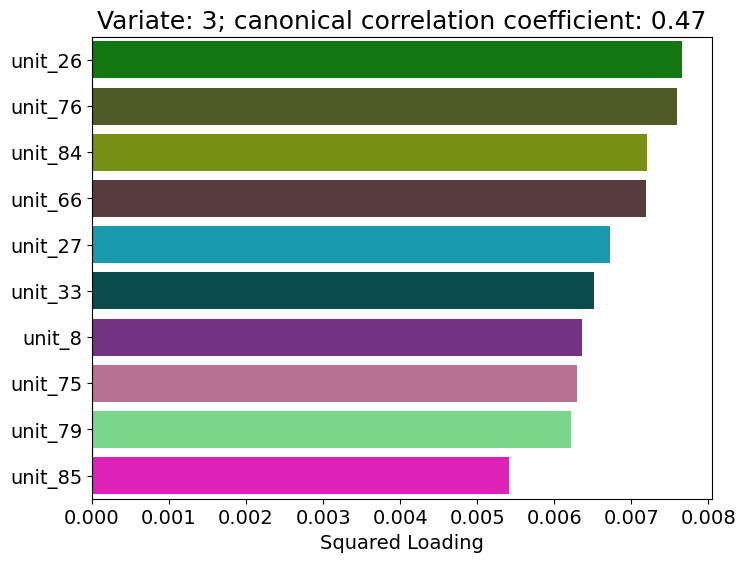

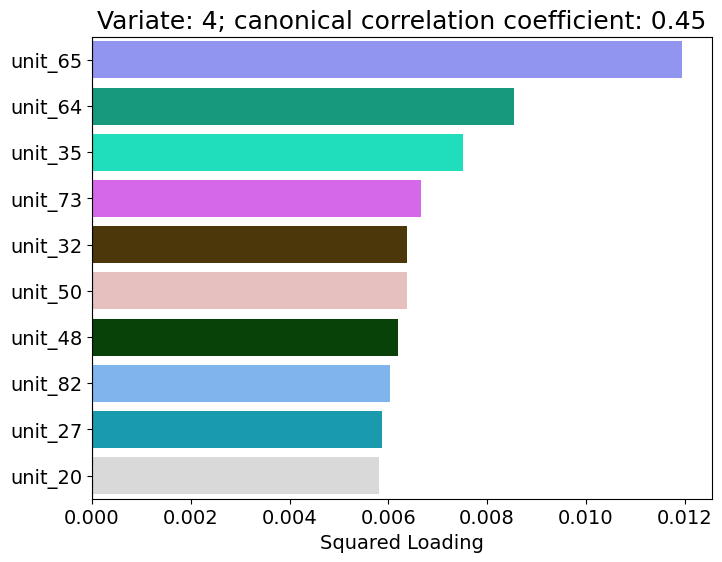

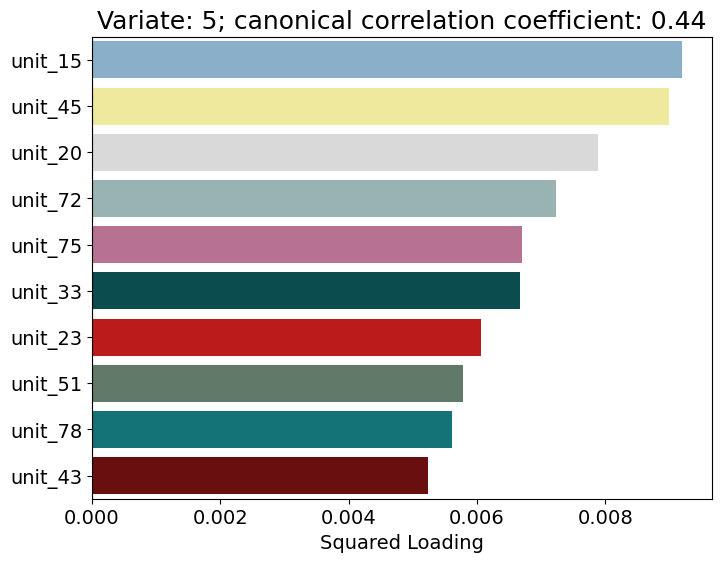

In [108]:
cca_inst.plot_ranked_weights(abs_value=False)

### behavior

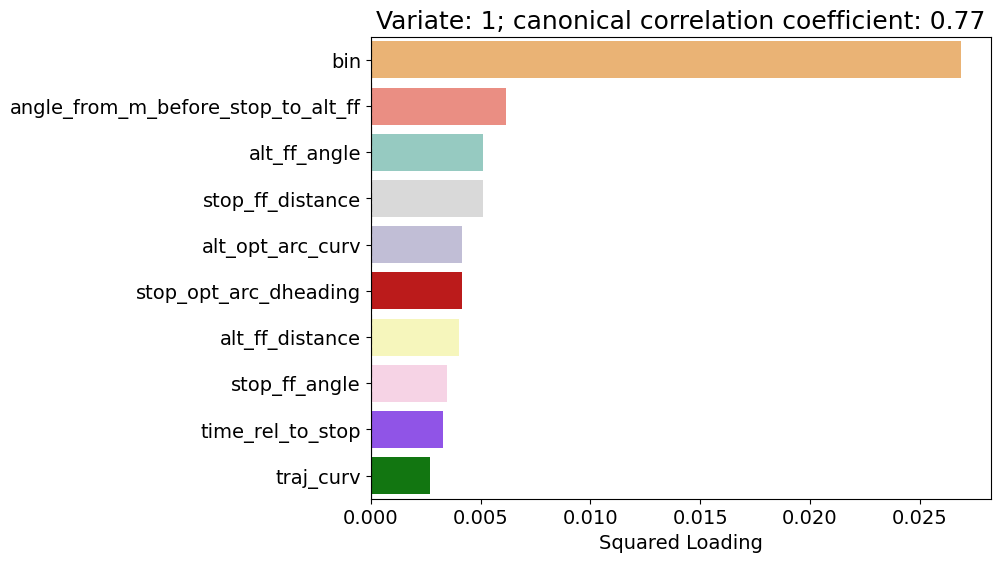

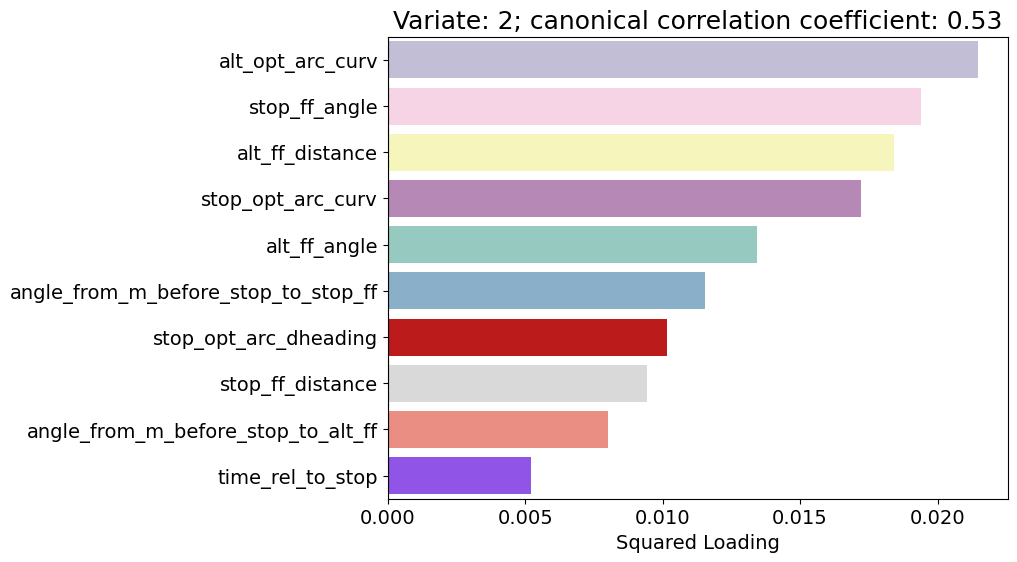

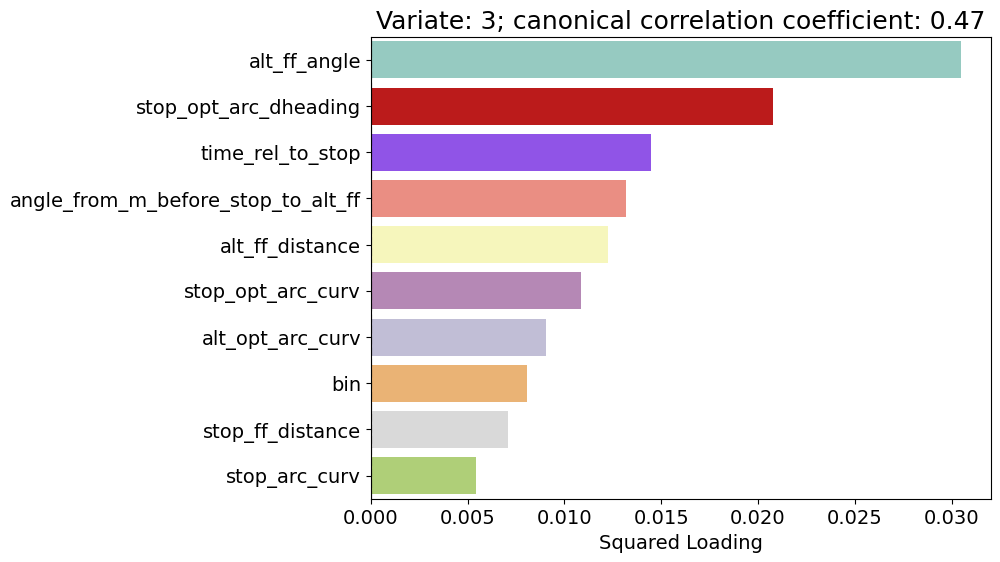

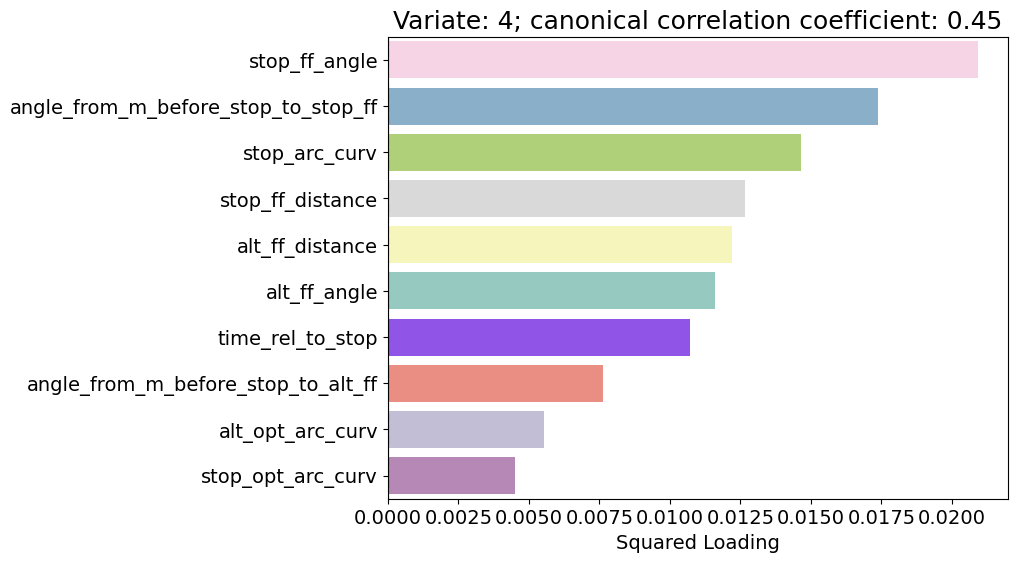

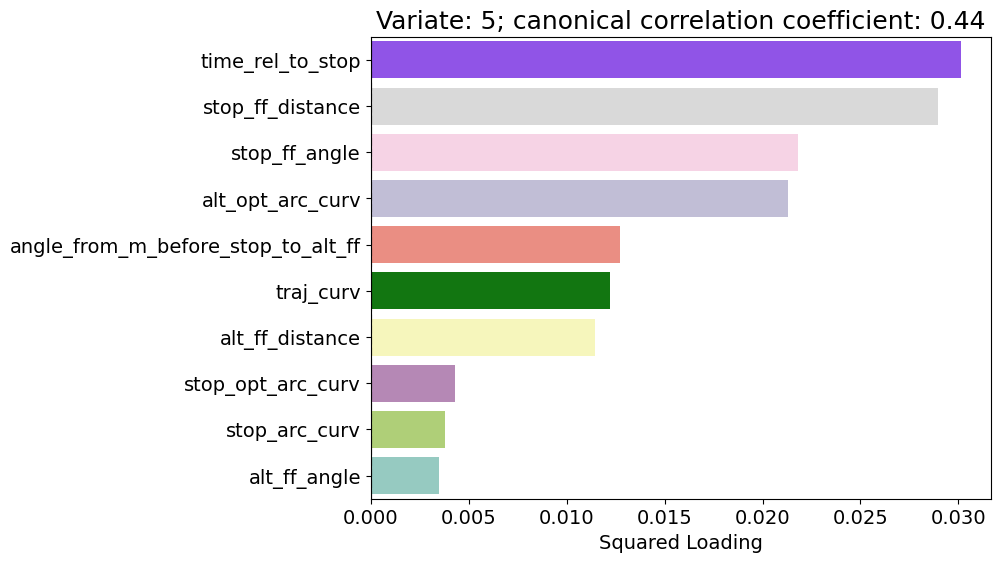

In [109]:
cca_inst.plot_ranked_weights(X1_or_X2='X2', abs_value=False)

In [110]:
stop here!

SyntaxError: invalid syntax (2745754519.py, line 1)

## distribution of each feature

In [113]:
cca_inst.X2_sc.shape

(643, 13)

In [114]:
X2_sc_df = pd.DataFrame(cca_inst.X2_sc, columns = cca_inst.X2.columns)
X2_sc_df.describe()

,nxt_ff_angle,nxt_ff_distance,alt_opt_arc_curv,time_rel_to_stop,traj_curv,cur_ff_angle,cur_ff_distance,cur_arc_curv,cur_opt_arc_curv,cur_opt_arc_dheading,bin,angle_from_m_before_stop_to_cur_ff,angle_from_m_before_stop_to_nxt_ff
count,643.00000,643.00000,643.00000,643.00000,643.00000,643.00000,643.00000,643.00000,643.00000,643.00000,643.00000,643.00000,643.00000
mean,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000
std,1.00078,1.00078,1.00078,1.00078,1.00078,1.00078,1.00078,1.00078,1.00078,1.00078,1.00078,1.00078,1.00078
min,-3.06447,-2.16544,-3.96562,-1.57732,-4.34350,-3.30498,-1.50602,-5.55899,-4.43541,-4.43994,-1.49796,-1.57970,-2.68969
25%,-0.59119,-0.70745,-0.55576,-0.83880,-0.54890,-0.49543,-0.89544,-0.24500,-0.41238,-0.21820,-0.92666,-0.91121,-0.50680
50%,-0.00339,-0.02846,0.02744,-0.07506,0.05584,0.02315,-0.09456,0.01361,0.03549,0.00683,-0.07230,-0.01794,0.00350
75%,0.55422,0.72042,0.59426,0.69499,0.57181,0.56417,0.78160,0.27760,0.42158,0.26639,0.91524,0.92376,0.66084
max,3.04556,2.89990,3.69564,3.08152,3.79653,3.51721,2.61942,6.79992,5.89334,4.41010,1.65778,1.72121,2.95743


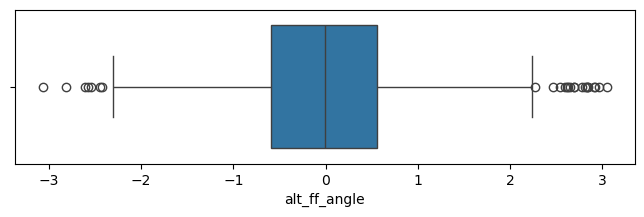

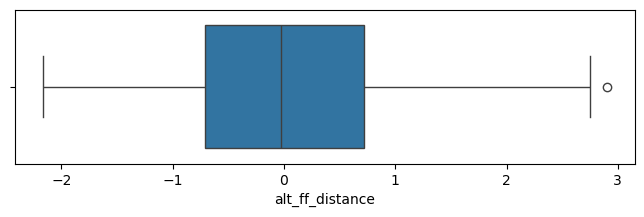

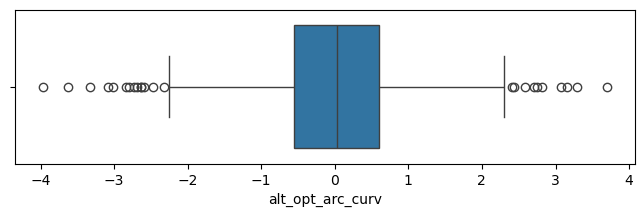

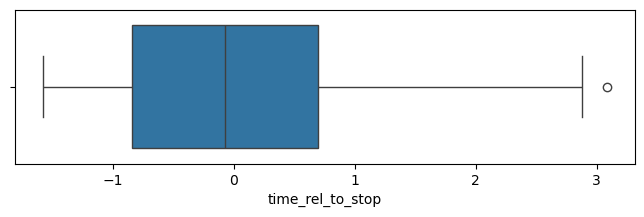

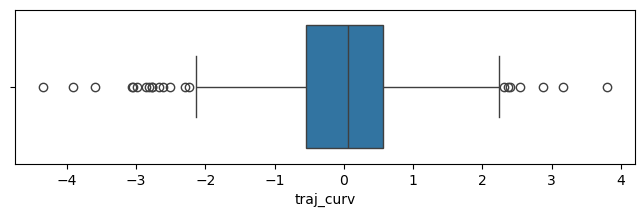

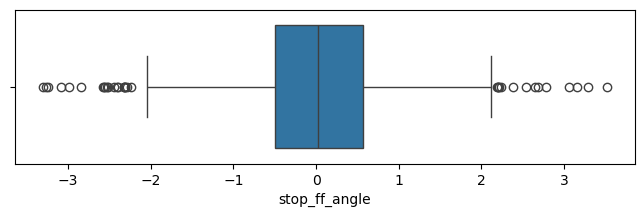

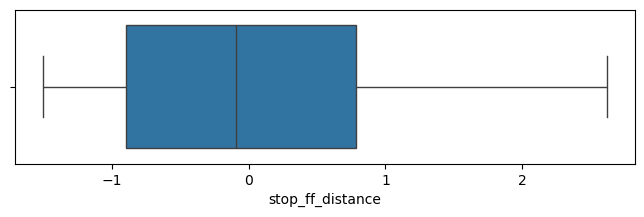

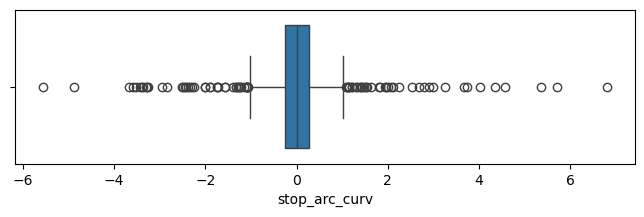

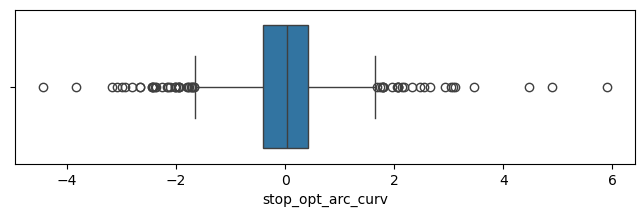

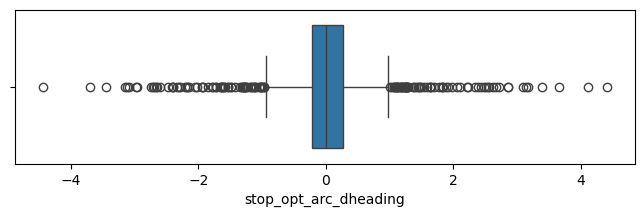

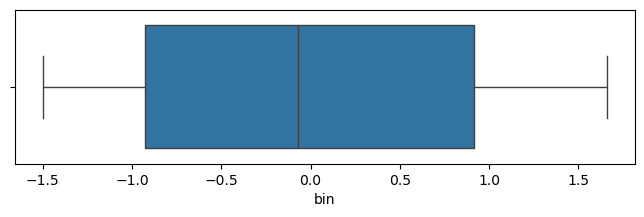

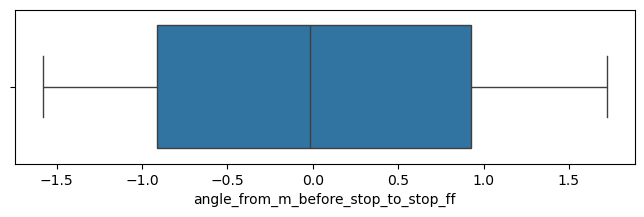

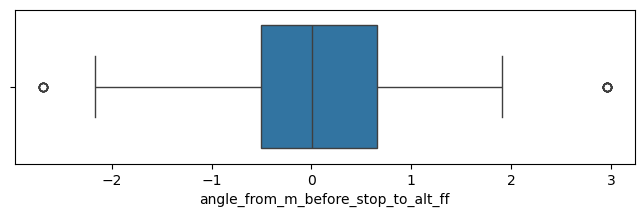

In [120]:
for column in X2_sc_df.columns:
    plt.figure(figsize=(8, 2))
    sns.boxplot(X2_sc_df[column], orient='h')
    plt.show()
    

## heatmap of weights
raw canonical coefficients are interpreted in a manner analogous to interpreting regression coefficients. For example: a one unit increase in reading leads to a .0446 decrease in the first canonical variate of set 2 when all of the other variables are held constant (in some other data)

In [116]:
weight_df = cca_inst.X2_weight_df.copy()
weight_df = weight_df.set_index('feature').drop(columns='feature_category')

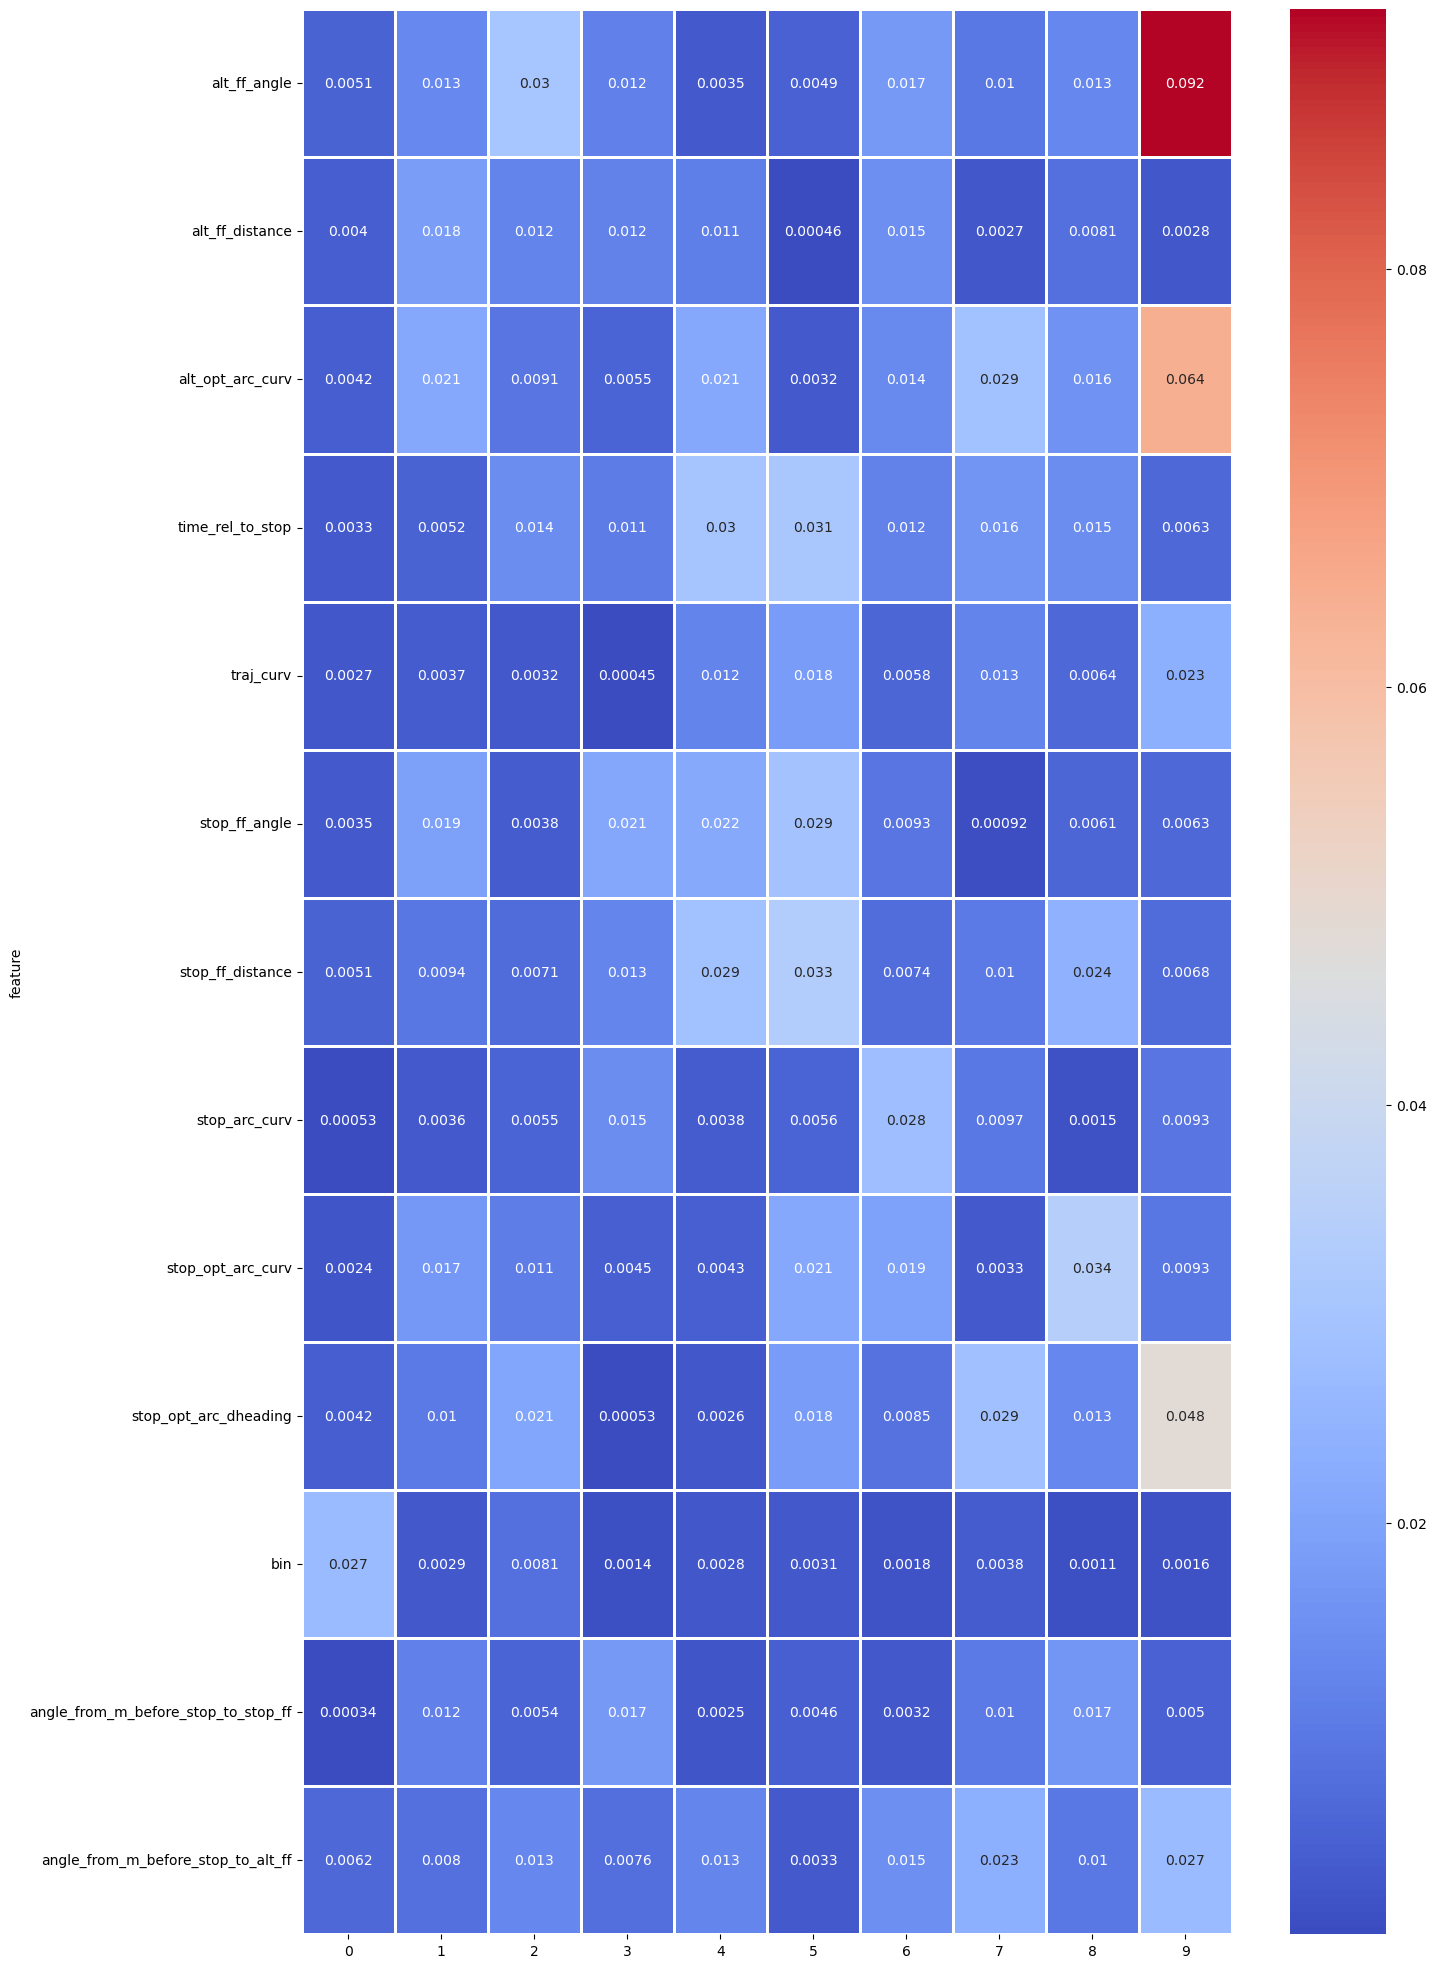

In [118]:
plt.subplots(figsize=(15, 25))
sns.heatmap(weight_df.iloc[:20, :10], cmap='coolwarm', annot=True, linewidths=1)
plt.show()

## train test split

In [ ]:
train1, test1, train2, test2 = train_test_split(cca_inst.X1_sc, cca_inst.X2_sc, test_size=0.3, random_state=42)
# use training and testing set
nComponents = 10
cca2 = rcca.CCA(kernelcca = False, reg = 0., numCC = nComponents)
cca2.train([train1, train2])
testcorrs = cca2.validate([test1, test2])
testcorrs

Training CCA, kernel = None, regularization = 0.0000, 10 components


[array([ 0.16601,  0.27052, -0.04265,  0.21392,  0.07385,  0.04497,
         0.06918,  0.18854,  0.3288 , -0.04117,  0.10374,  0.41179,
         0.18181,  0.07008,  0.41278,  0.12765,  0.23815,  0.30137,
         0.13773,  0.32709,  0.40904,  0.42835,  0.36056,  0.16633,
         0.09906,  0.1593 ,  0.15809,  0.18762,  0.26092,  0.07841,
         0.1701 , -0.03962,  0.1092 ,  0.22486,  0.17081,  0.10919,
        -0.00575,  0.07872,  0.12964,  0.06004,  0.09885,  0.16676,
         0.24769,  0.14249,  0.45882,  0.14811,  0.45575, -0.00484,
         0.29337,  0.18232,  0.31452,  0.21348, -0.08977,  0.17961,
         0.06483,  0.07506,  0.1021 ,  0.19136,  0.23868,  0.1411 ,
         0.20266,  0.04708,  0.15282,  0.16654,  0.2962 ,  0.30952,
         0.12753,  0.07337,  0.09376,  0.14056,  0.04767,  0.37859,
         0.33603,  0.14019,  0.20891,  0.57302,  0.06753,  0.18801,
         0.09678,  0.038  ,  0.09279,  0.20425,  0.17003, -0.17356,
         0.14512,  0.11225]),
 array([ 0.72085, 

## compute explained variance

In [ ]:
cca2.compute_ev([test1, test2])

Computing explained variance for component #1
Computing explained variance for component #2
Computing explained variance for component #3
Computing explained variance for component #4
Computing explained variance for component #5
Computing explained variance for component #6
Computing explained variance for component #7
Computing explained variance for component #8
Computing explained variance for component #9
Computing explained variance for component #10


[array([[0.29637, 0.47038, 0.0378 , 0.36736, 0.14814, 0.26158, 0.0574 ,
         0.40039, 0.35631, 0.09605, 0.20393, 0.39169, 0.25049, 0.30972,
         0.40985, 0.1003 , 0.35105, 0.37228, 0.29432, 0.28156, 0.42894,
         0.09537, 0.45769, 0.31349, 0.26853, 0.32976, 0.38649, 0.34388,
         0.43198, 0.20538, 0.28921, 0.0131 , 0.25439, 0.25955, 0.11433,
         0.24517, 0.19142, 0.36757, 0.44289, 0.06147, 0.40519, 0.26793,
         0.26298, 0.26871, 0.50794, 0.06231, 0.54603, 0.16127, 0.35585,
         0.34024, 0.34508, 0.34122, 0.09512, 0.42817, 0.27054, 0.17302,
         0.37314, 0.34602, 0.41733, 0.27742, 0.22038, 0.29469, 0.22737,
         0.27435, 0.482  , 0.39625, 0.28468, 0.3218 , 0.28524, 0.16089,
         0.3863 , 0.44471, 0.31012, 0.13947, 0.17785, 0.52656, 0.23378,
         0.28259, 0.29749, 0.03473, 0.33107, 0.37959, 0.24742, 0.1145 ,
         0.19848, 0.13219],
        [0.16685, 0.19671, 0.13099, 0.25375, 0.08233, 0.07183, 0.1471 ,
         0.0396 , 0.06539, 0.27389, 

## test for p values

In [ ]:
stats_cca = CanCorr(cca_inst.X1_sc, cca_inst.X2_sc)
print(stats_cca.corr_test().summary())
neural_data_modeling.print_weights('X', stats_cca.x_cancoef)
neural_data_modeling.print_weights('Z', stats_cca.y_cancoef)

                              Cancorr results
   Canonical Correlation Wilks' lambda   Num DF     Den DF   F Value Pr > F
---------------------------------------------------------------------------
0                 0.8285        0.0208 3698.0000 547860.8057 15.6925 0.0000
1                 0.6838        0.0663 3570.0000 536405.3663 11.2254 0.0000
2                 0.6092        0.1245 3444.0000 524911.9670  8.8637 0.0000
3                 0.5047        0.1980 3320.0000 513379.2826  7.1067 0.0000
4                 0.4896        0.2656 3198.0000 501805.9337  6.0168 0.0000
5                 0.4324        0.3494 3078.0000 490190.4845  4.9415 0.0000
6                 0.4096        0.4297 2960.0000 478531.4418  4.1163 0.0000
7                 0.3536        0.5163 2844.0000 466827.2525  3.3447 0.0000
8                 0.3113        0.5901 2730.0000 455076.3024  2.7753 0.0000
9                 0.2571        0.6534 2618.0000 443276.9151  2.3315 0.0000
10                0.2159        0.6997 250

# PGAM

In [ ]:
## Categorize variables
data_item.y_var.columns
temporal_vars = ['time_rel_to_stop',
 'time_when_nxt_ff_first_seen_rel_to_stop',
 'time_when_cur_ff_first_seen_rel_to_stop',
 'time_when_nxt_ff_last_seen_rel_to_stop',
 'time_when_cur_ff_last_seen_rel_to_stop',
 ]

spatial_vars = [x for x in data_item.y_var.columns if x not in temporal_vars]
spatial_vars